In [1]:
# %%

In [2]:
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
r = re.compile(r"(\w+)\(([a-z0-9%]+)\), cnt : (\d+)")
lev_r = re.compile(r"lev\[\d+\] : (\d+)")
def analyze(filename):
    with open(filename) as f:
        arr = []
        while True:
            line = f.readline()
            if not line:
                break
            for name, percent, cnt in r.findall(line):
                if name in "MLfQ":
                    levs = lev_r.findall(line)
                    if levs:
                        arr.append((name, percent, 20, int(cnt), *list(map(int, levs))))
                    else:
                        arr.append((name, percent, 20, int(cnt), 0, 0, 0))
                else:
                    arr.append((name, "", int(percent[:-1]), int(cnt), 0, 0, 0))

        df = pd.DataFrame(arr, columns=["name", "type", "percent", "cnt", "lev0", "lev1", "lev2"])
        df["measured percent"] = df["cnt"] / df["cnt"].sum() * 100
        grouped_cnt_sum = df.groupby("name")["cnt"].sum()
        df2 = pd.merge(df, grouped_cnt_sum, "left", left_on = "name", right_on = "name")
        df["relative percent"] = df2["cnt_x"] / df2["cnt_y"] * 100
        df["z score"] = (df["measured percent"] - df["measured percent"].mean()) / df["measured percent"].std()
        df.sort_values(by=["name", "cnt"], inplace=True)
        return filename, df, grouped_cnt_sum

In [4]:
def get_workload(workload_num):
    prefix = f"test_results/scheduler_test_result_workload{workload_num}"
    logs = []
    for num in range(5):
        filename = f"{prefix}_{num:02}.txt"
        logs.append(analyze(filename))
    return logs

In [5]:
def print_workload(workload_num = 0):
    logs = get_workload(workload_num)

    for idx, (filename, df, group_cnt) in enumerate(logs):
        print(idx)
        print(df)
        print(group_cnt / group_cnt.sum() * 100)

In [6]:
def plot_workload(workload_num = 0, show_level=False):
    logs = get_workload(workload_num)
    fig = plt.figure(figsize = (50, 50 * (1 + show_level)))
    plt.title(logs[0][0][:-7])
    plt.axis("off")
    for idx, (filename, df, group_cnt) in enumerate(logs):
        plt.title(filename)
        labels = df.apply(lambda r: \
            (r["name"] + " (" + r["type"] + ")")
            if r["name"] == "MLfQ"
            else (r["name"] + " (" + str(r["percent"]) + "%" + ")")
        , axis=1)
        
        pie_chart = {
            "x": df["measured percent"],
            "labels": df["measured percent"].round(2).astype(str) + "%",
            "labeldistance": 0.8,
        }
        pie_chart_legend = {
            "labels": labels,
            "fontsize": 20,
            "loc": (0.4, 0.3),
        }

        bar_chart_legend = {
            "labels": ["lev0", "lev1", "lev2"],
            "fontsize": 20,
            "loc": (0.9, 0.9),
        }

        if show_level:
            ax = fig.add_subplot(5, 2, 2 * idx + 1)
            
            ax.pie(**pie_chart)
            ax.legend(**pie_chart_legend)

            ax2 = fig.add_subplot(5, 2, 2 * idx + 2)
            ax2.bar(df.index, df.lev0, width=0.3)
            ax2.bar(df.index+0.3, df.lev1, width=0.3)
            ax2.bar(df.index+0.6, df.lev2, width=0.3)
            ax2.legend(**bar_chart_legend)
        else:
            ax = fig.add_subplot(3, 2, idx + 1)
            ax.pie(**pie_chart)
            ax.legend(**pie_chart_legend)
    plt.show()

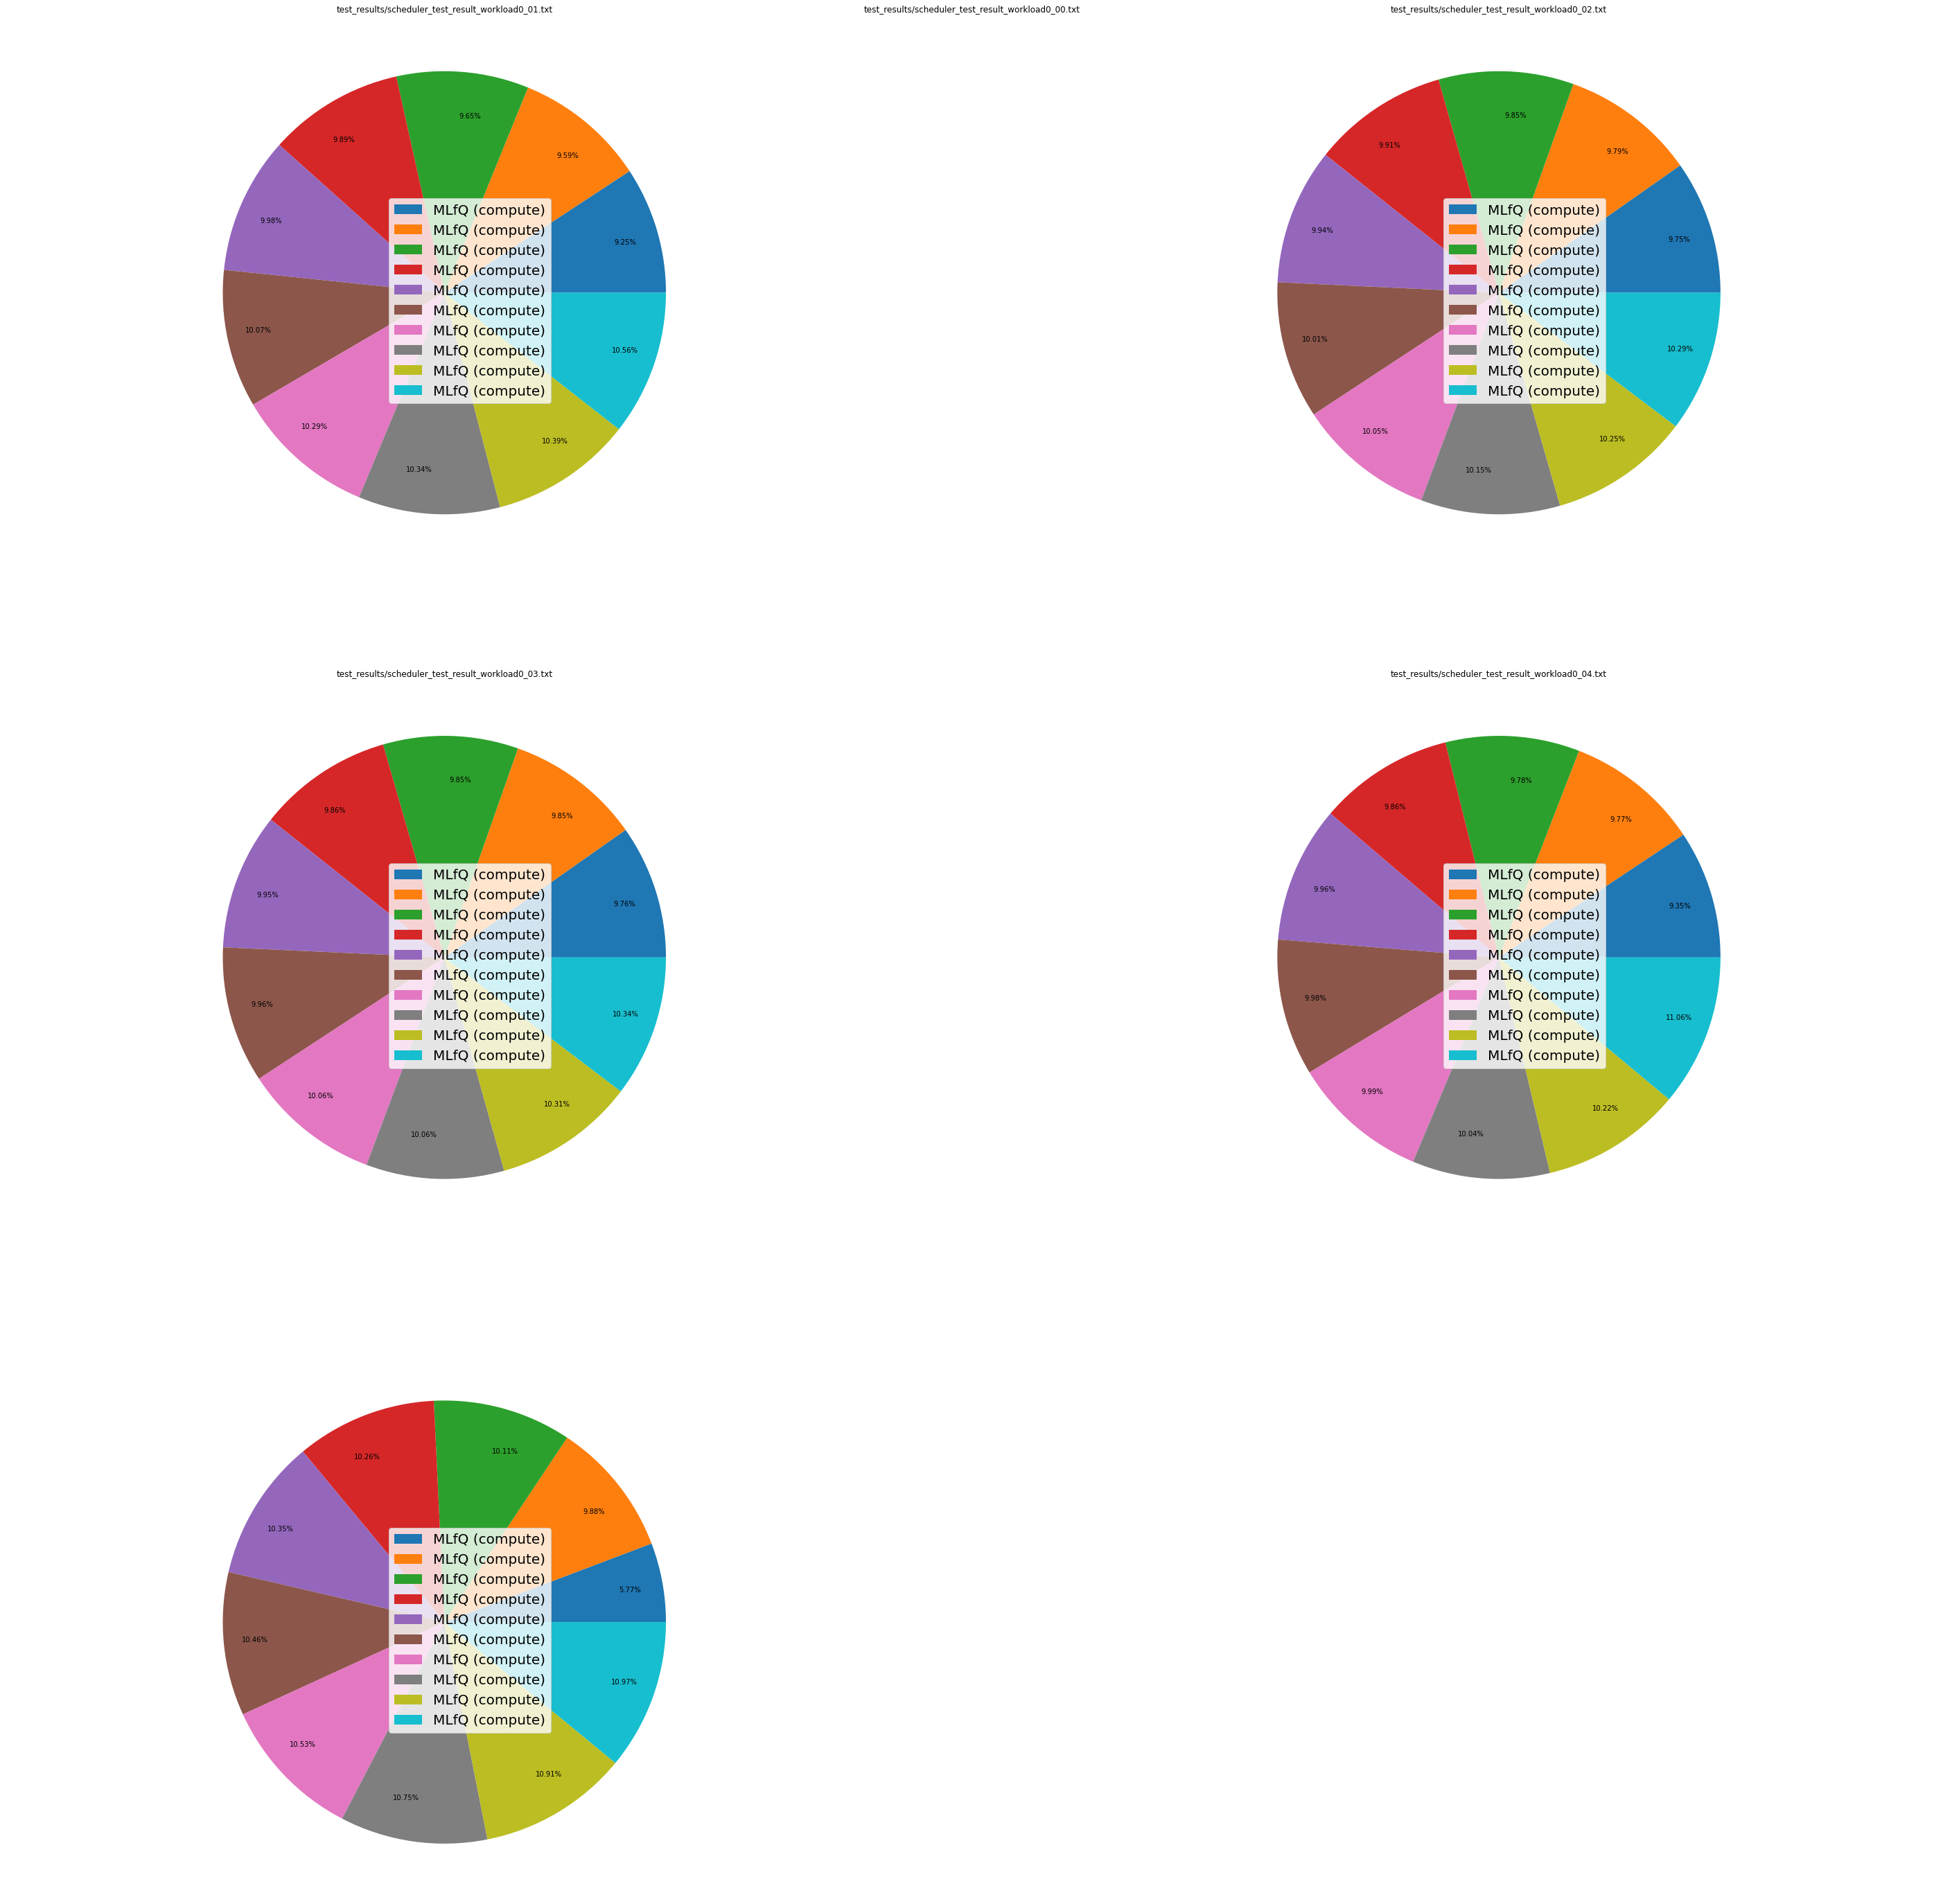

In [7]:
plot_workload(0)

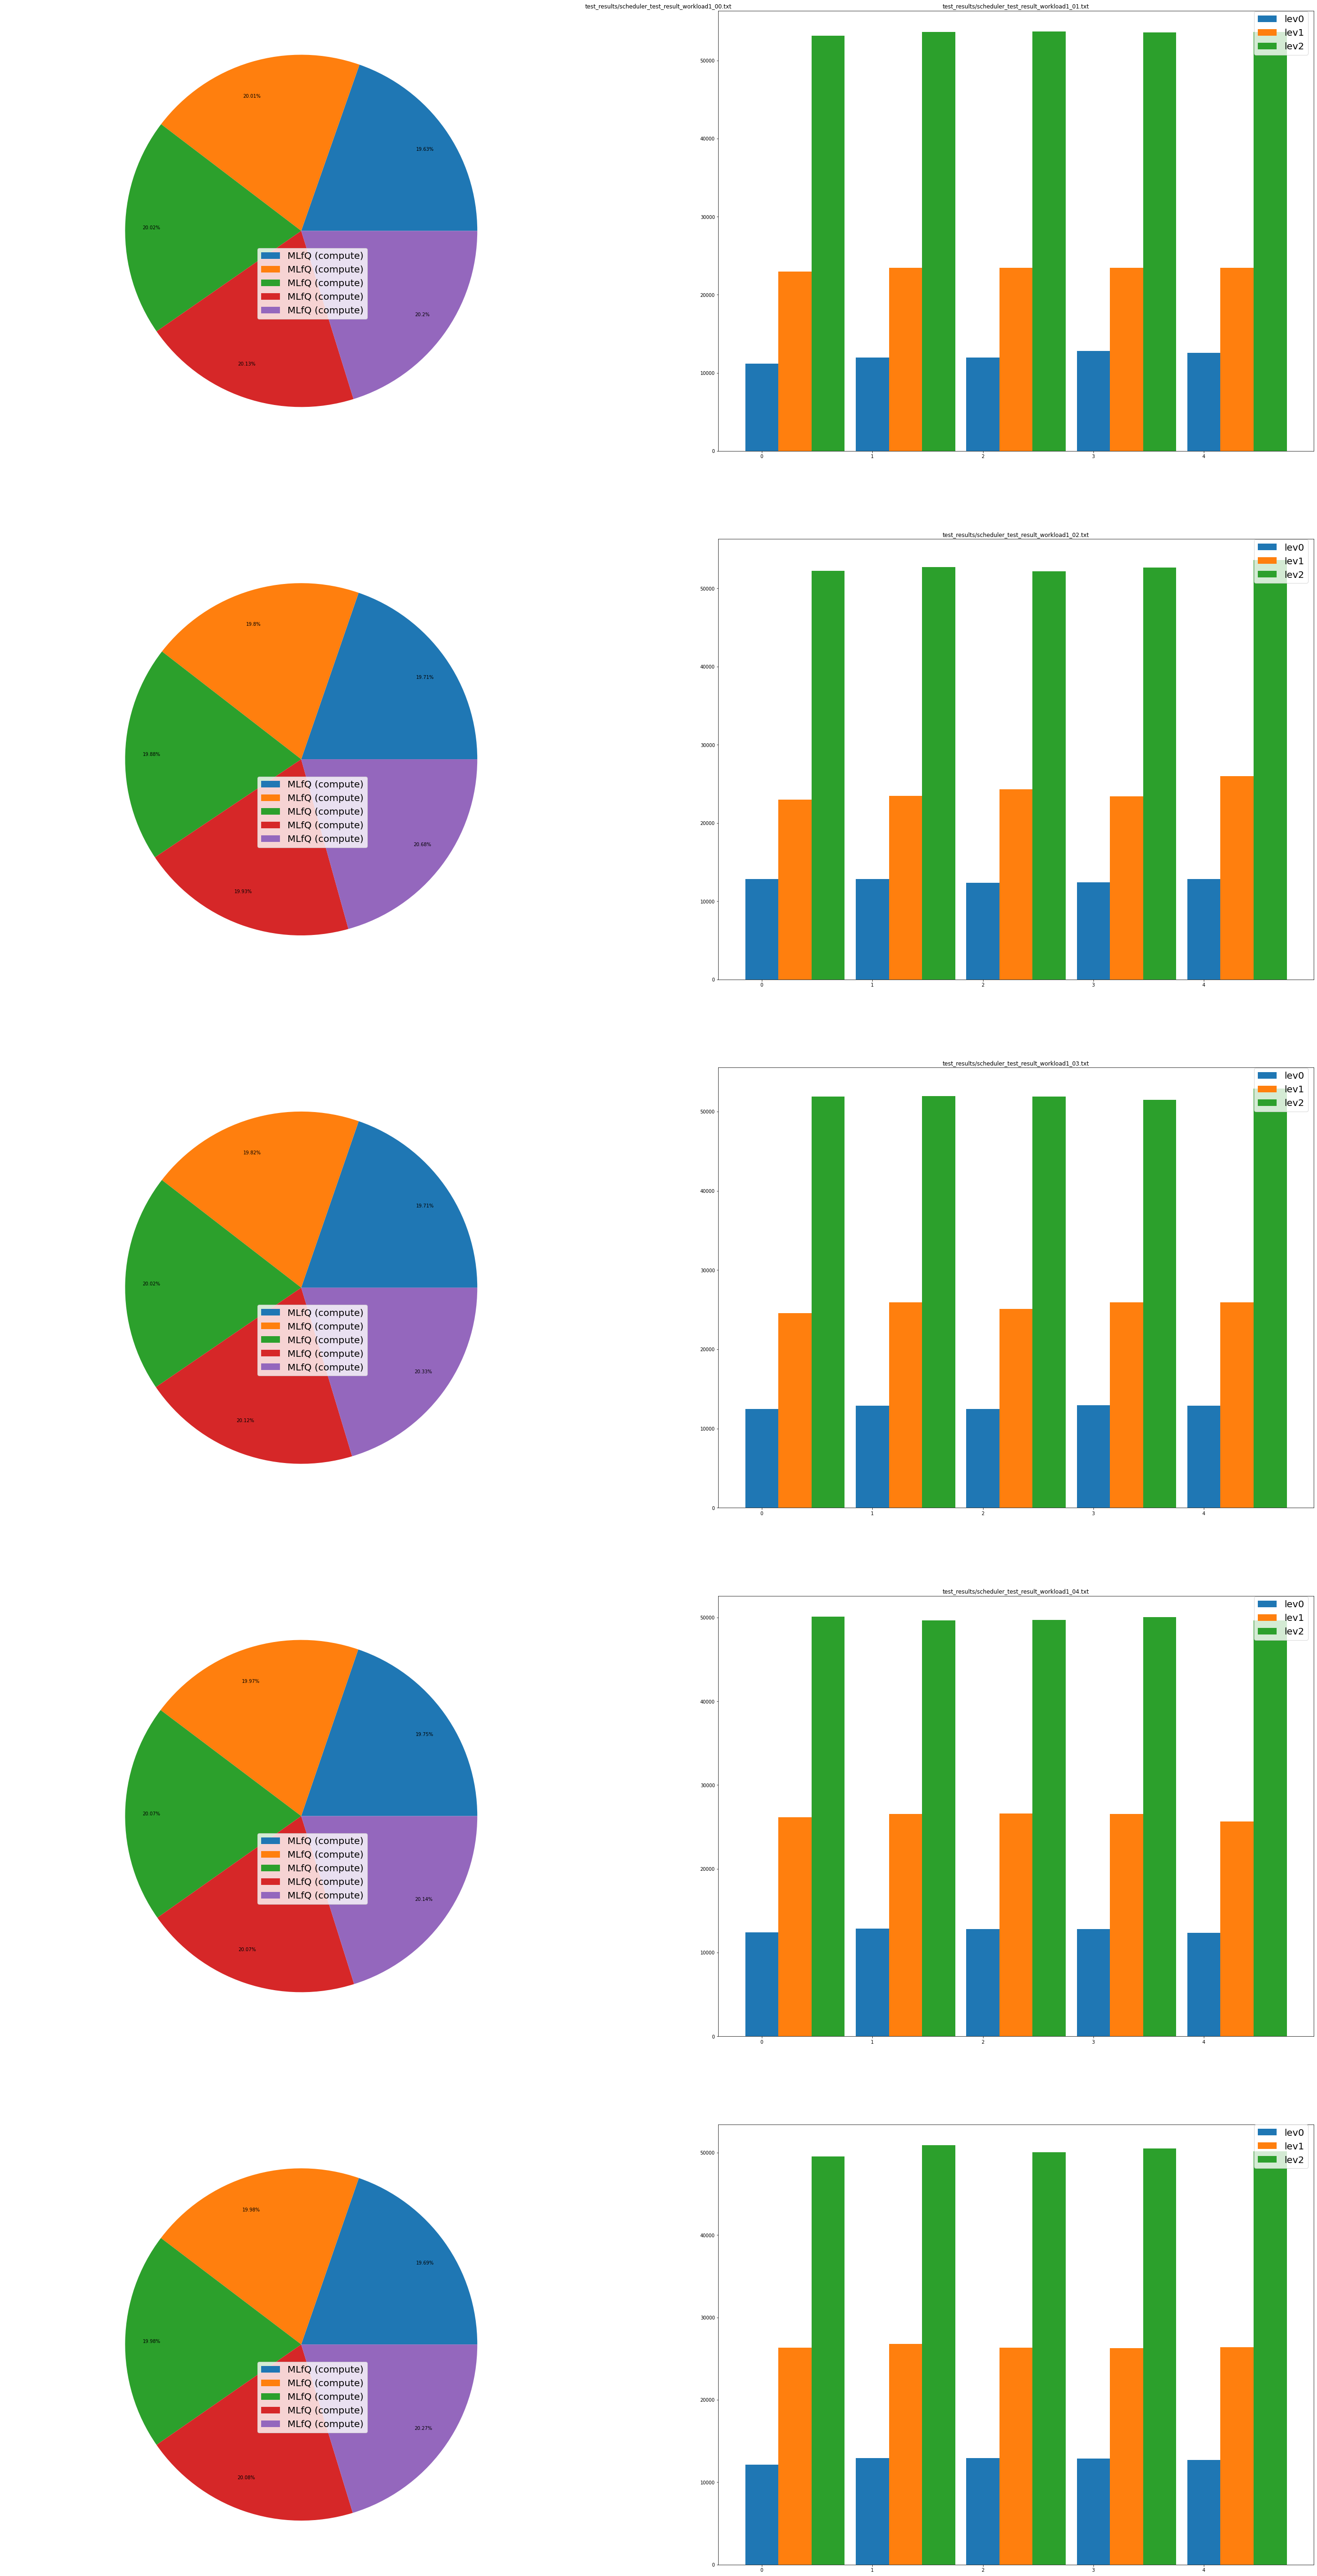

In [8]:
plot_workload(1, True)

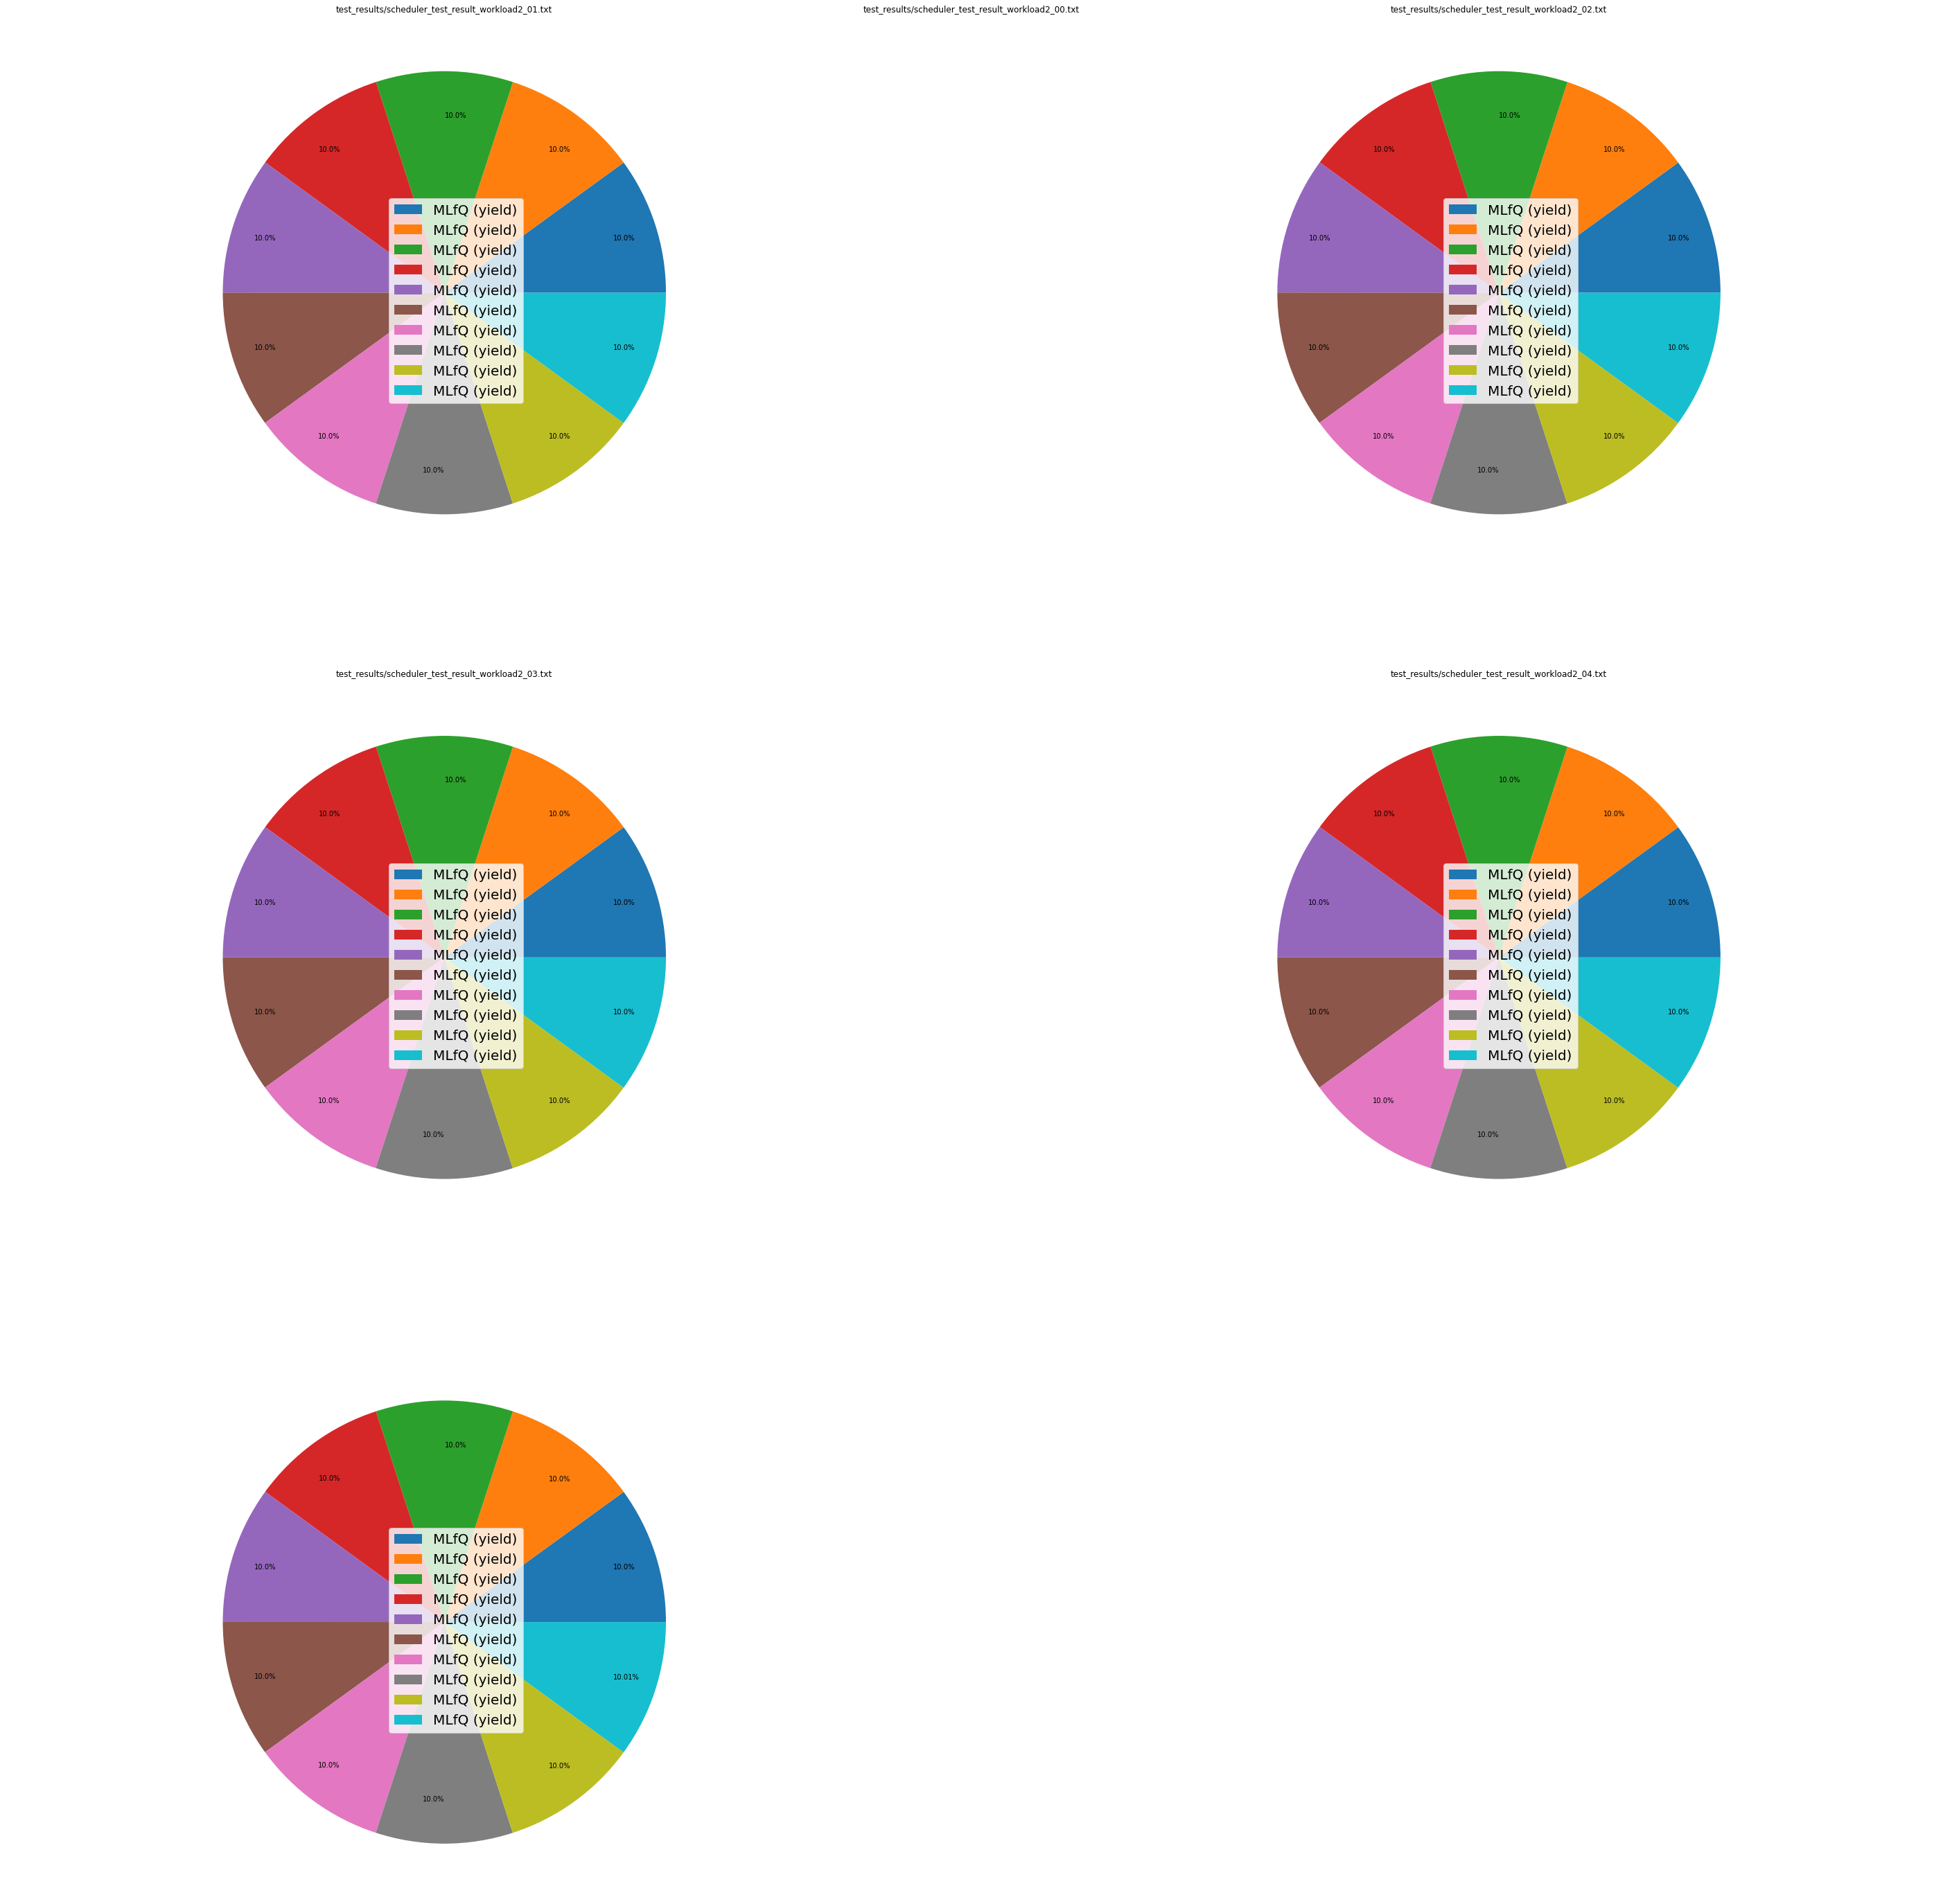

In [9]:
plot_workload(2)

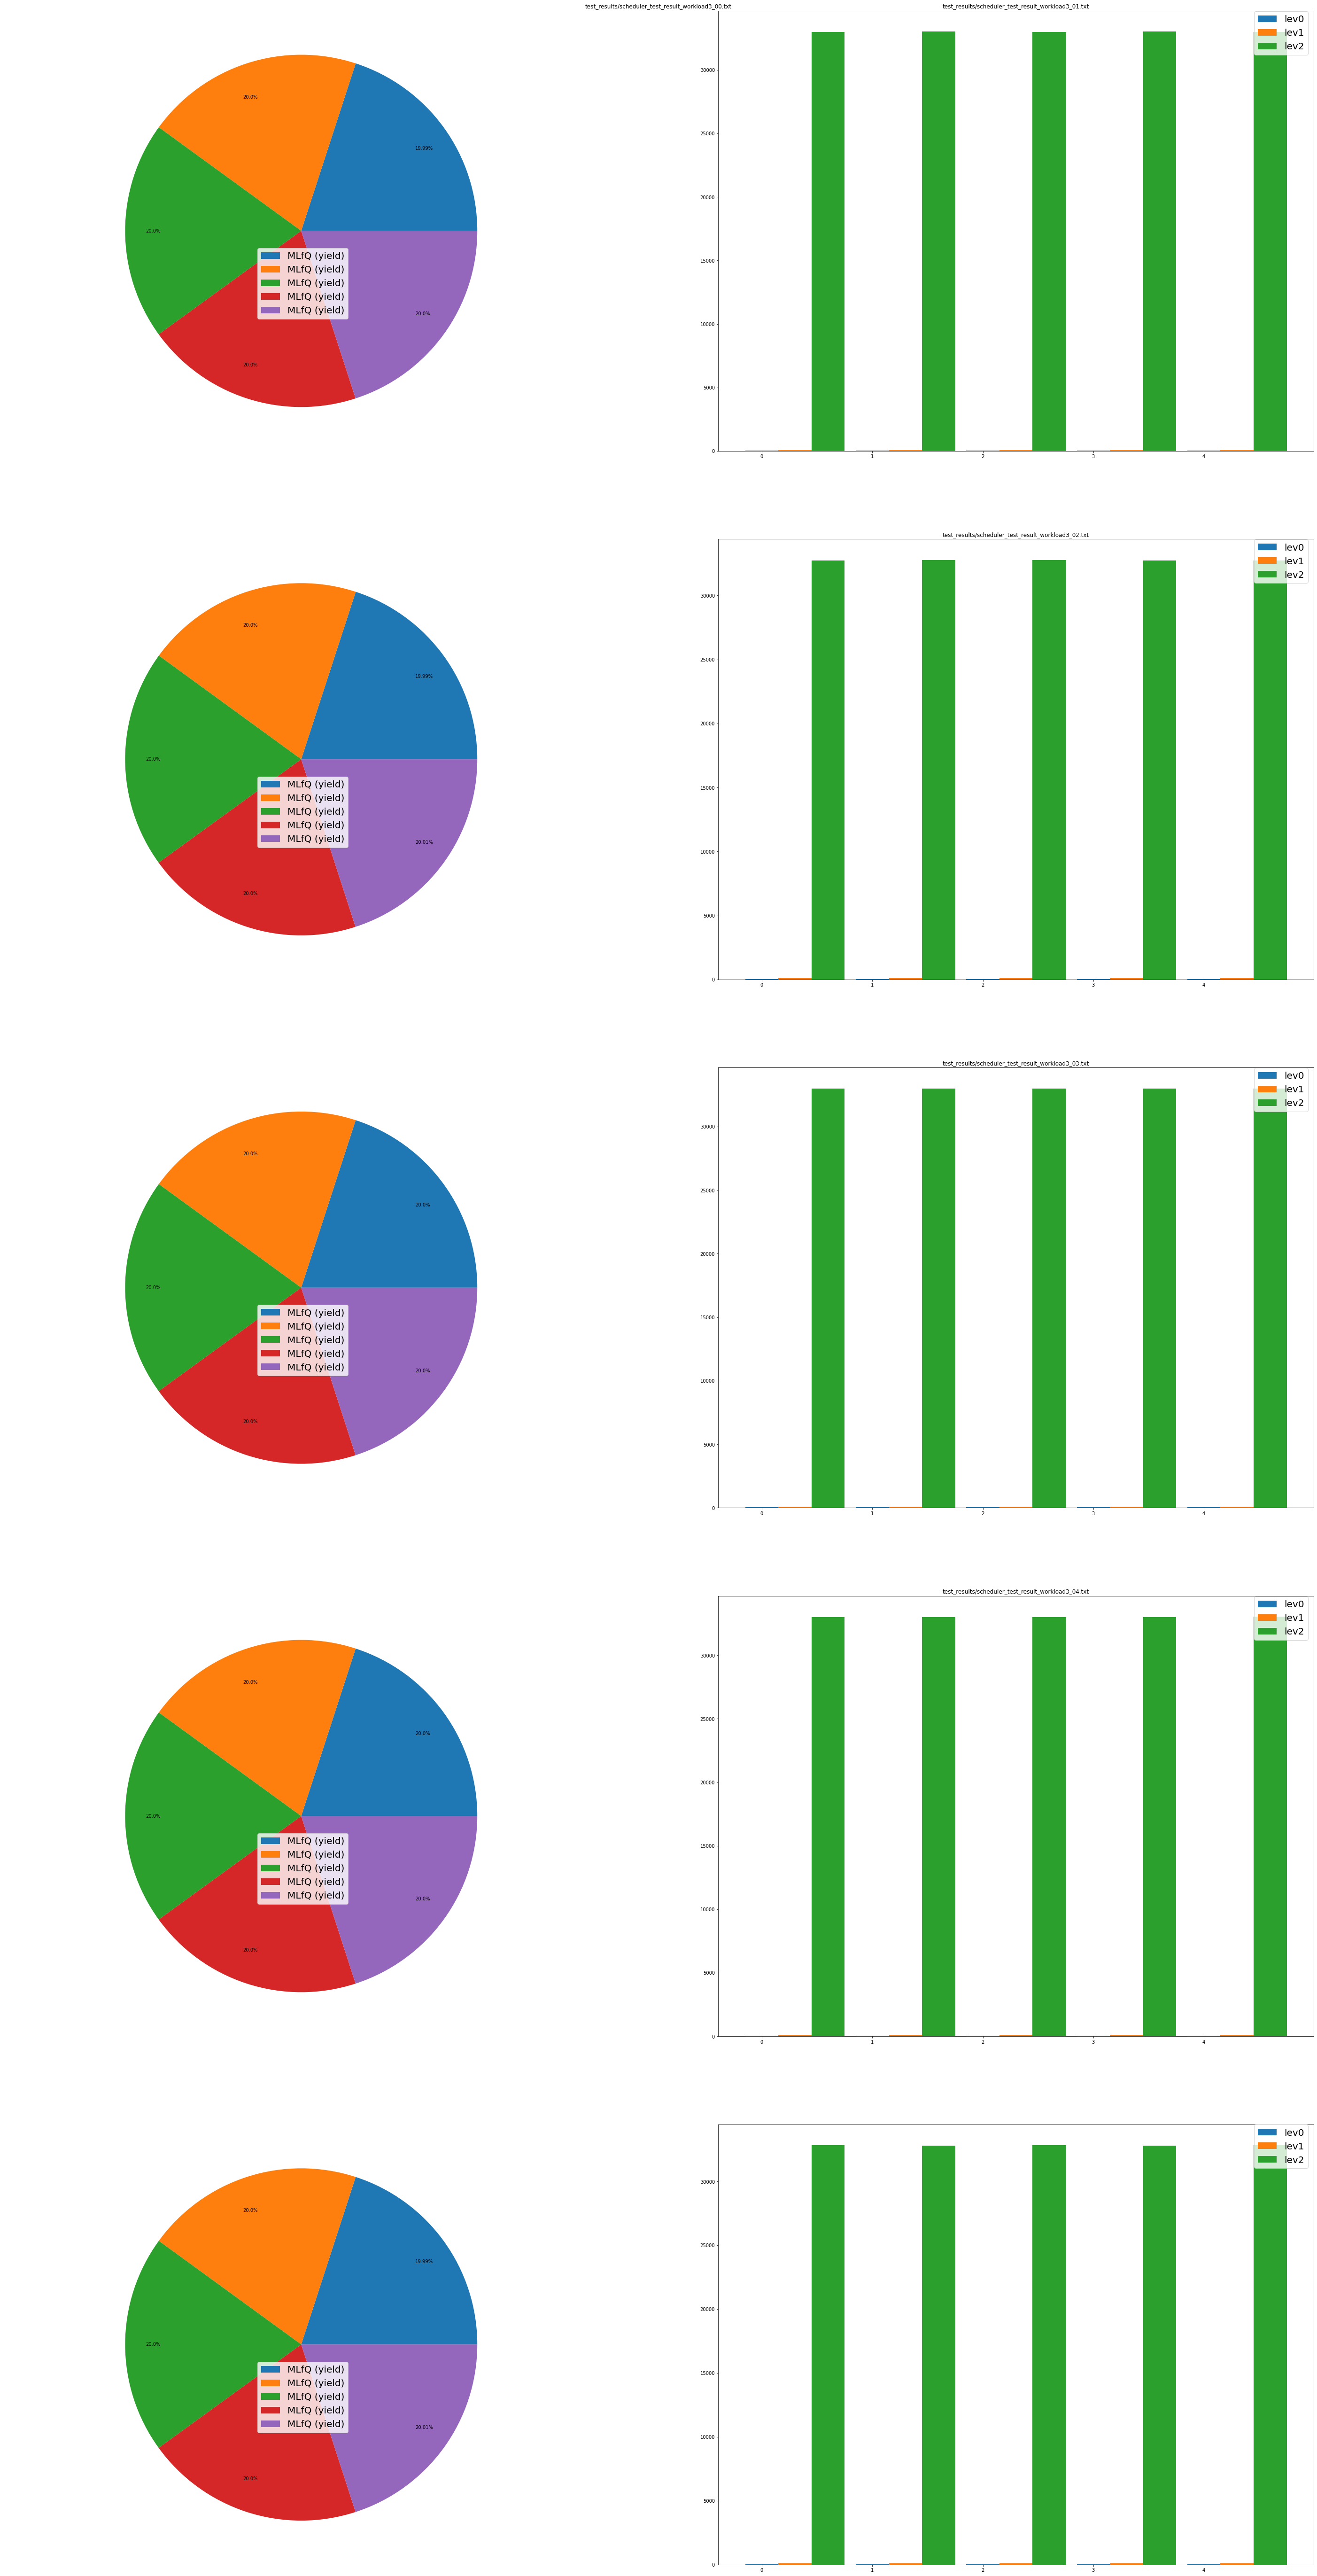

In [10]:
plot_workload(3, True)

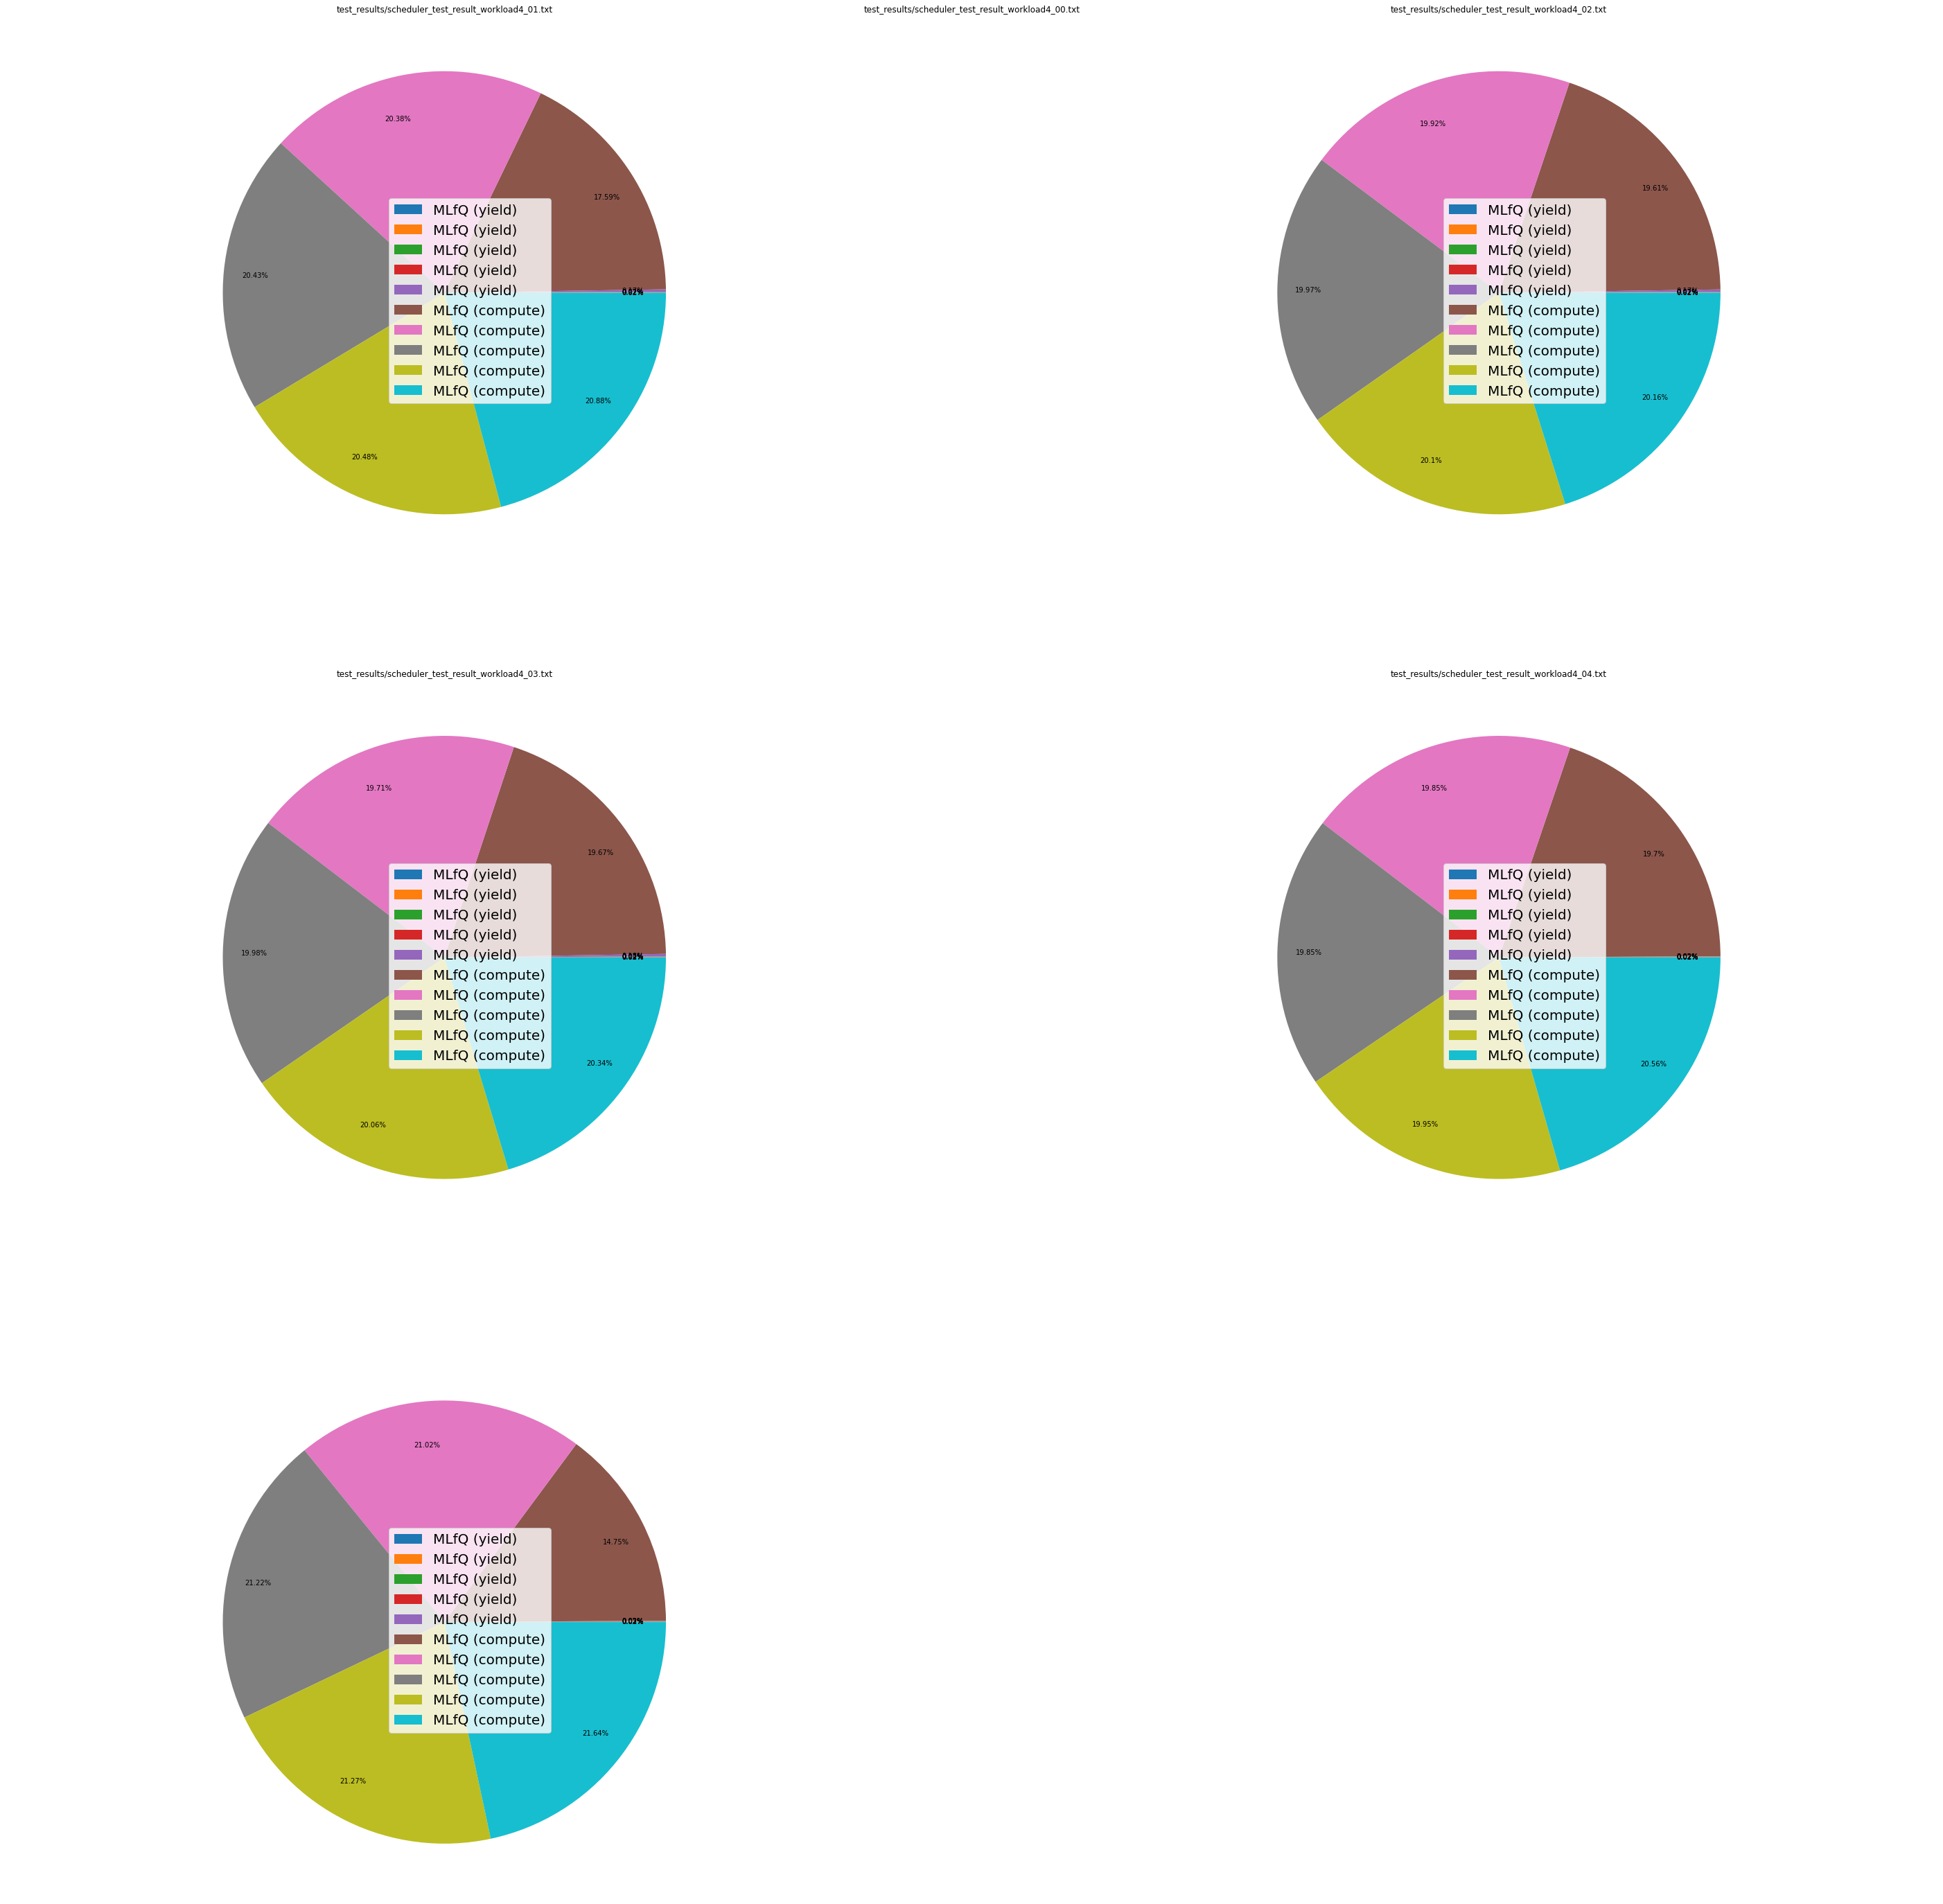

In [11]:
plot_workload(4)

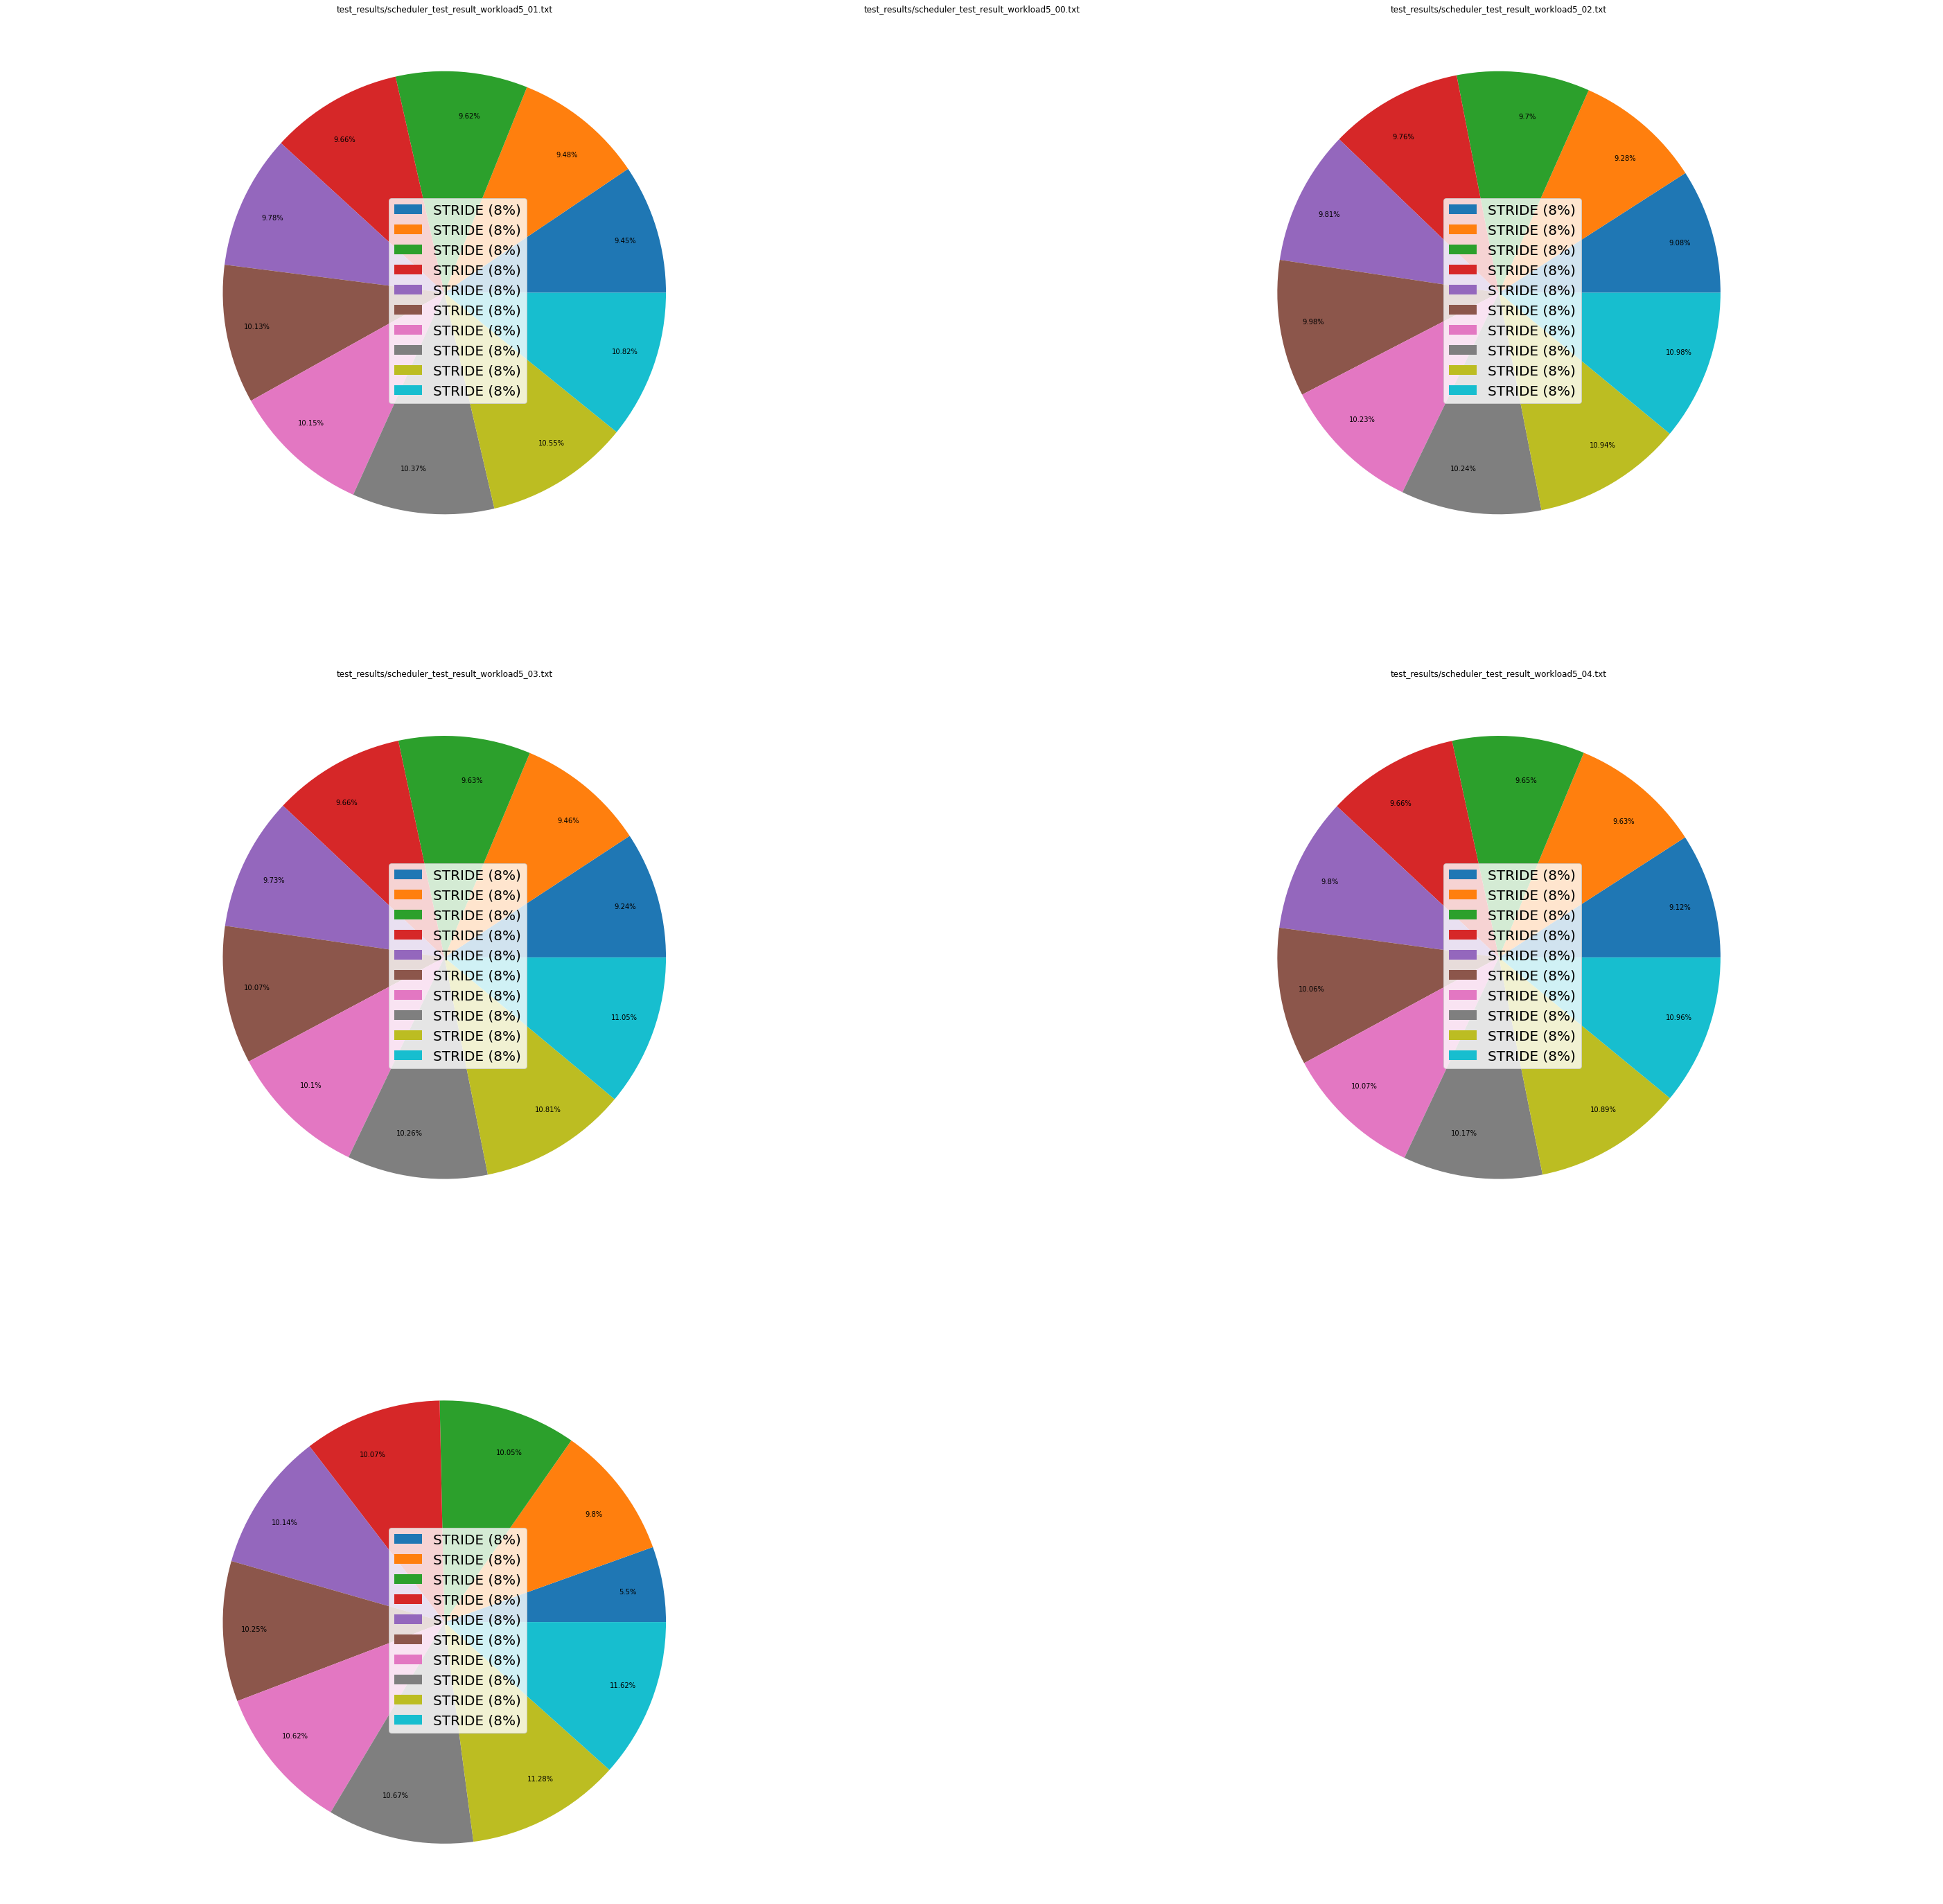

In [12]:
plot_workload(5)

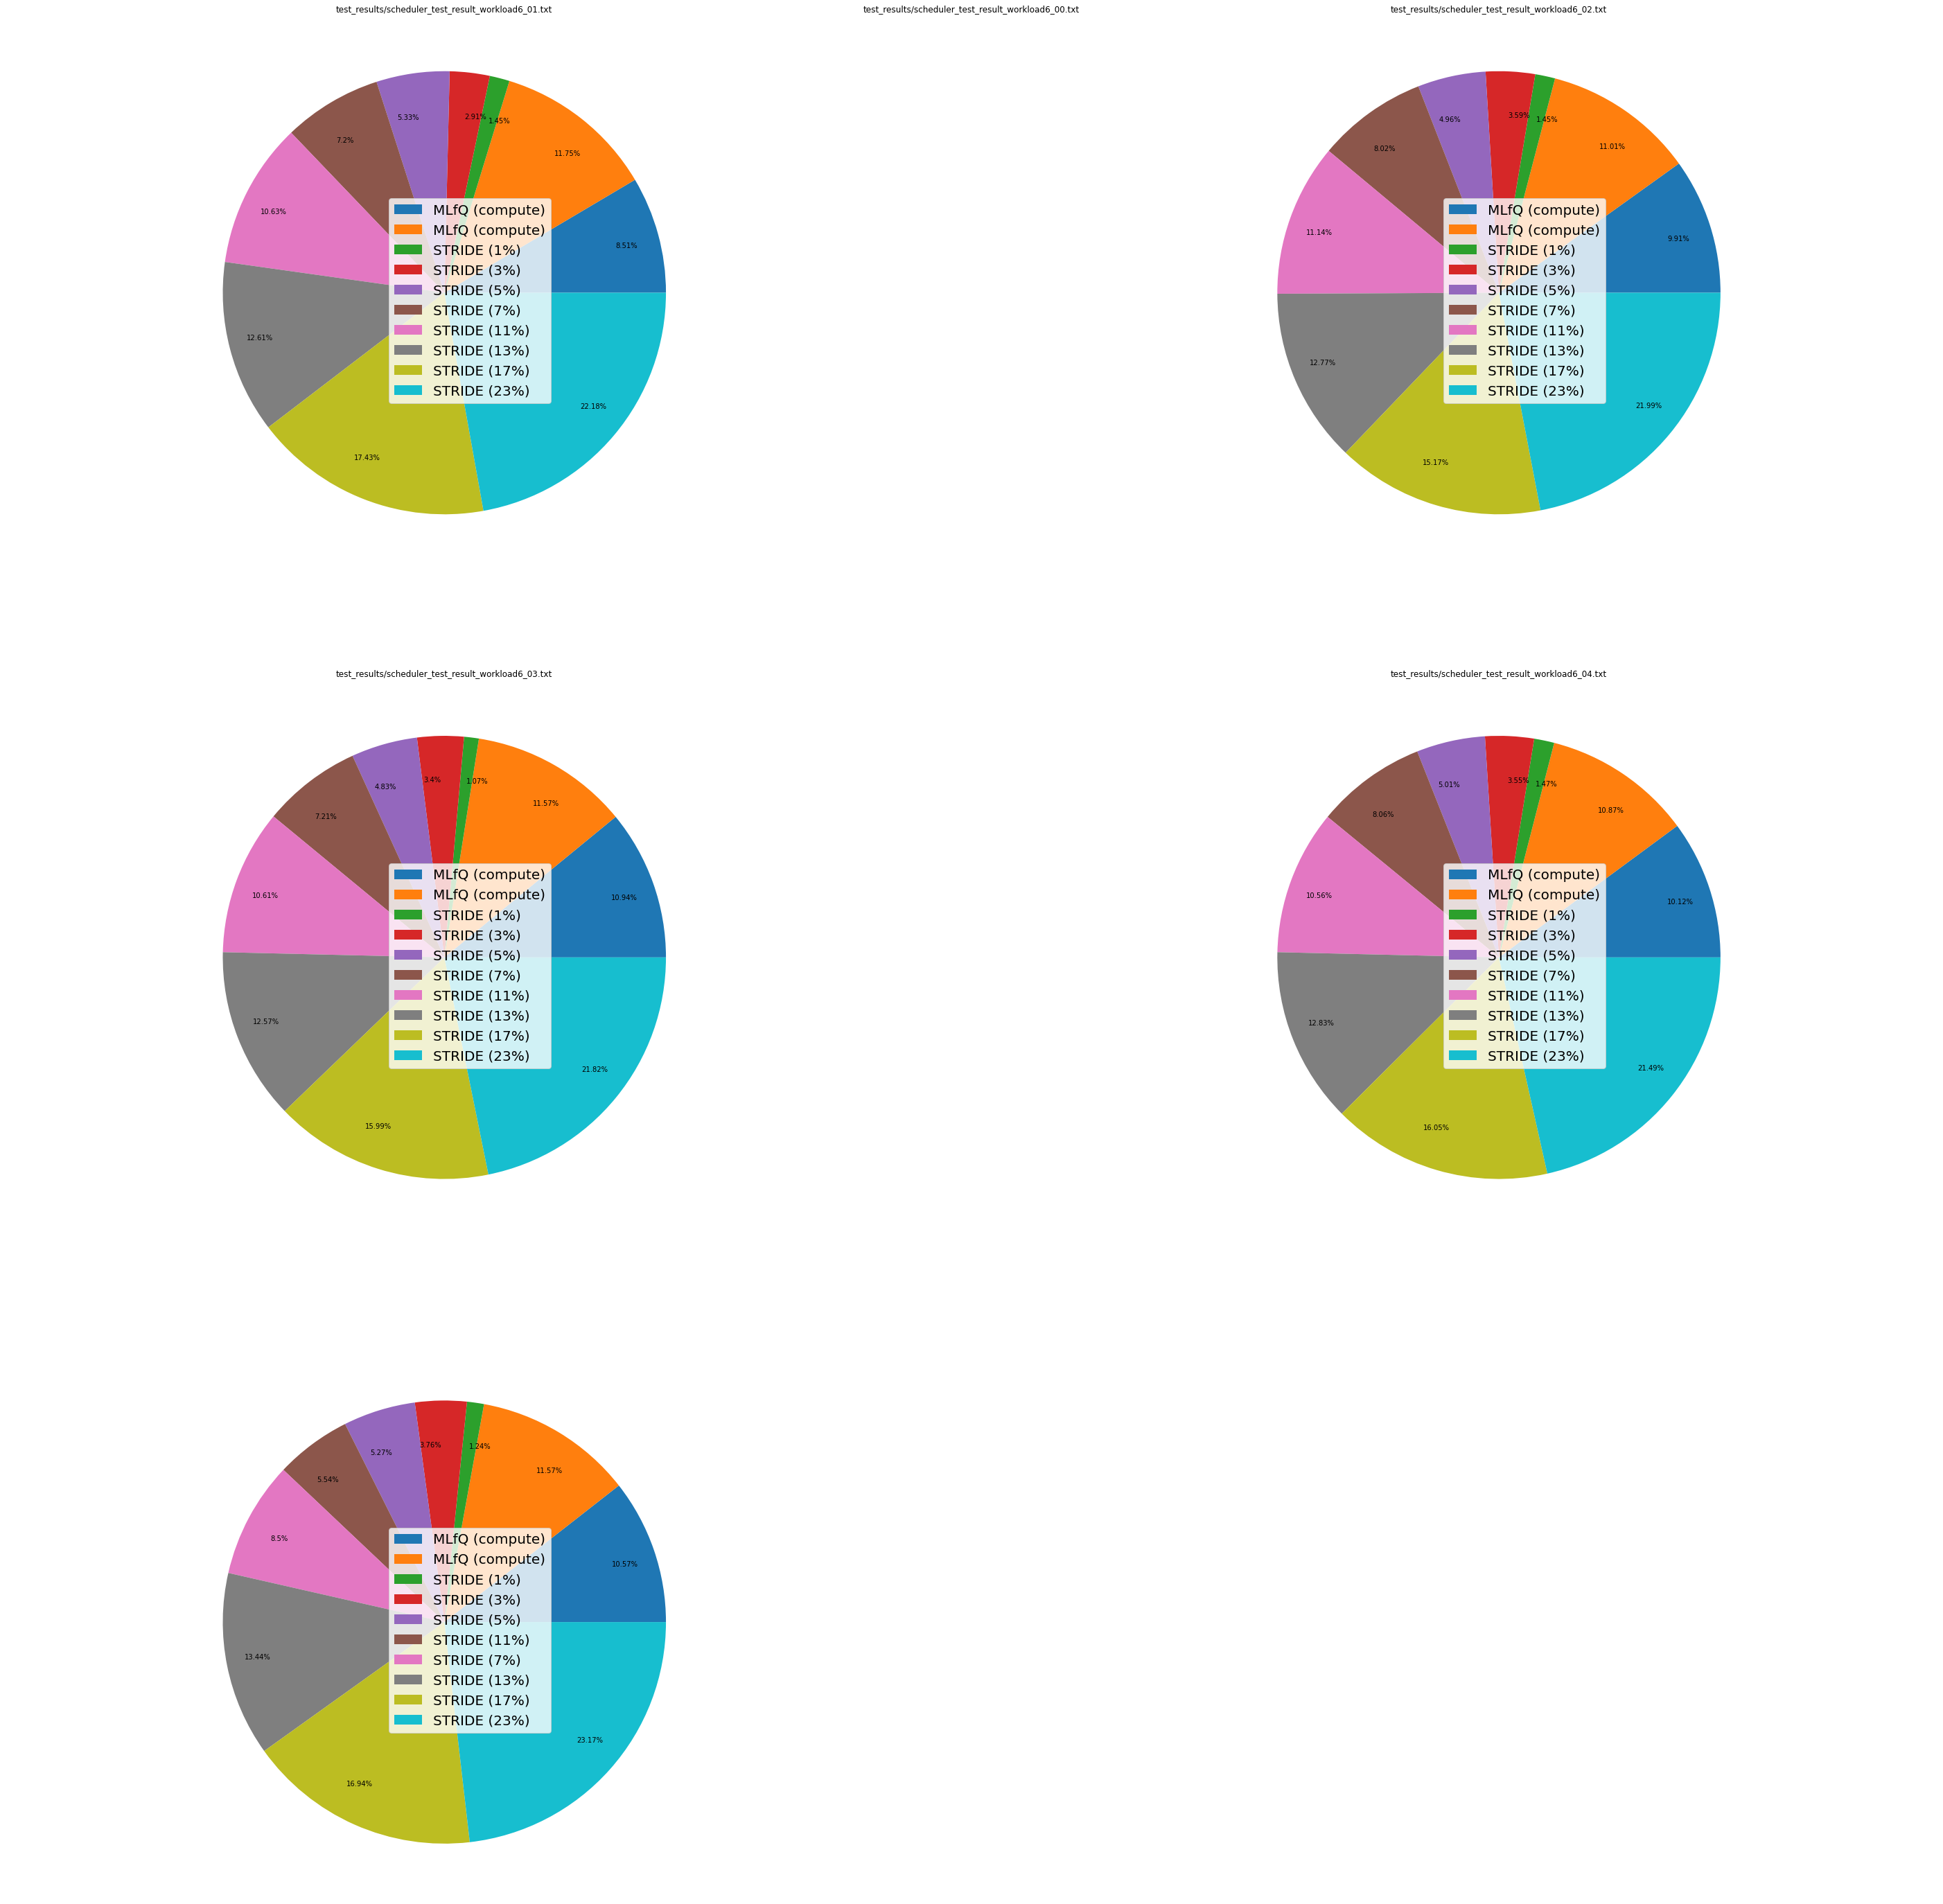

In [13]:
plot_workload(6)

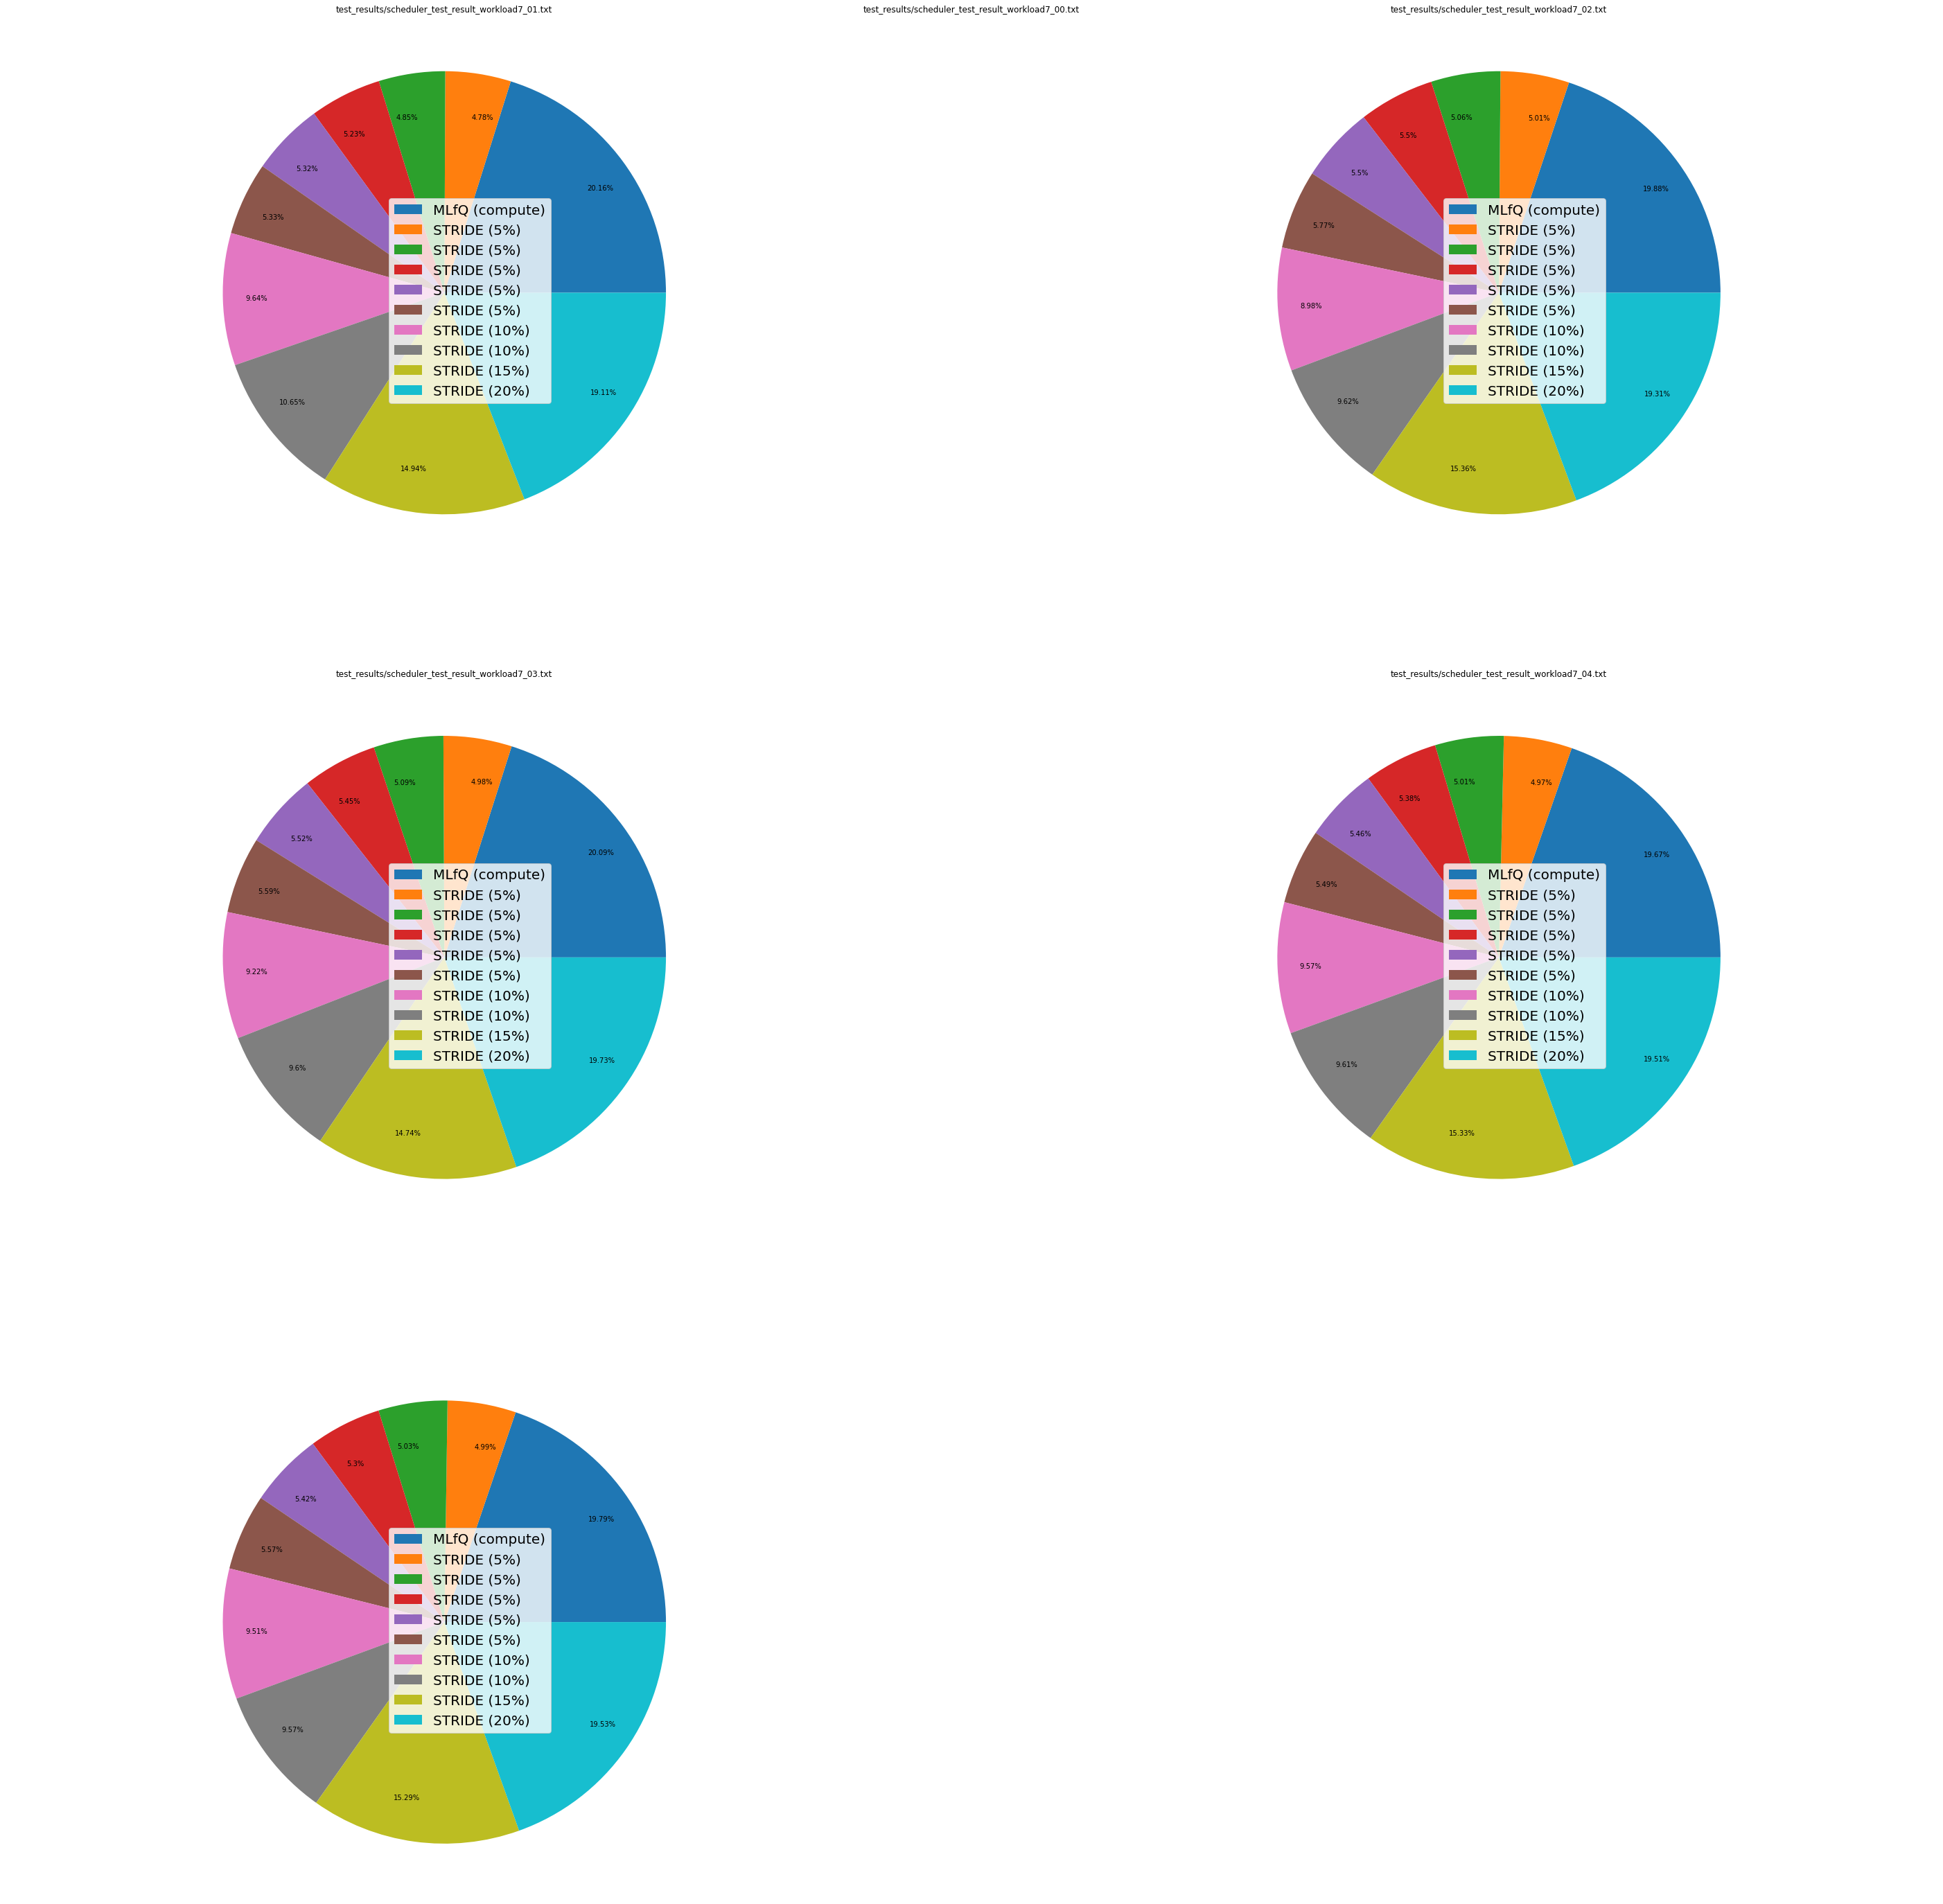

In [14]:
plot_workload(7)

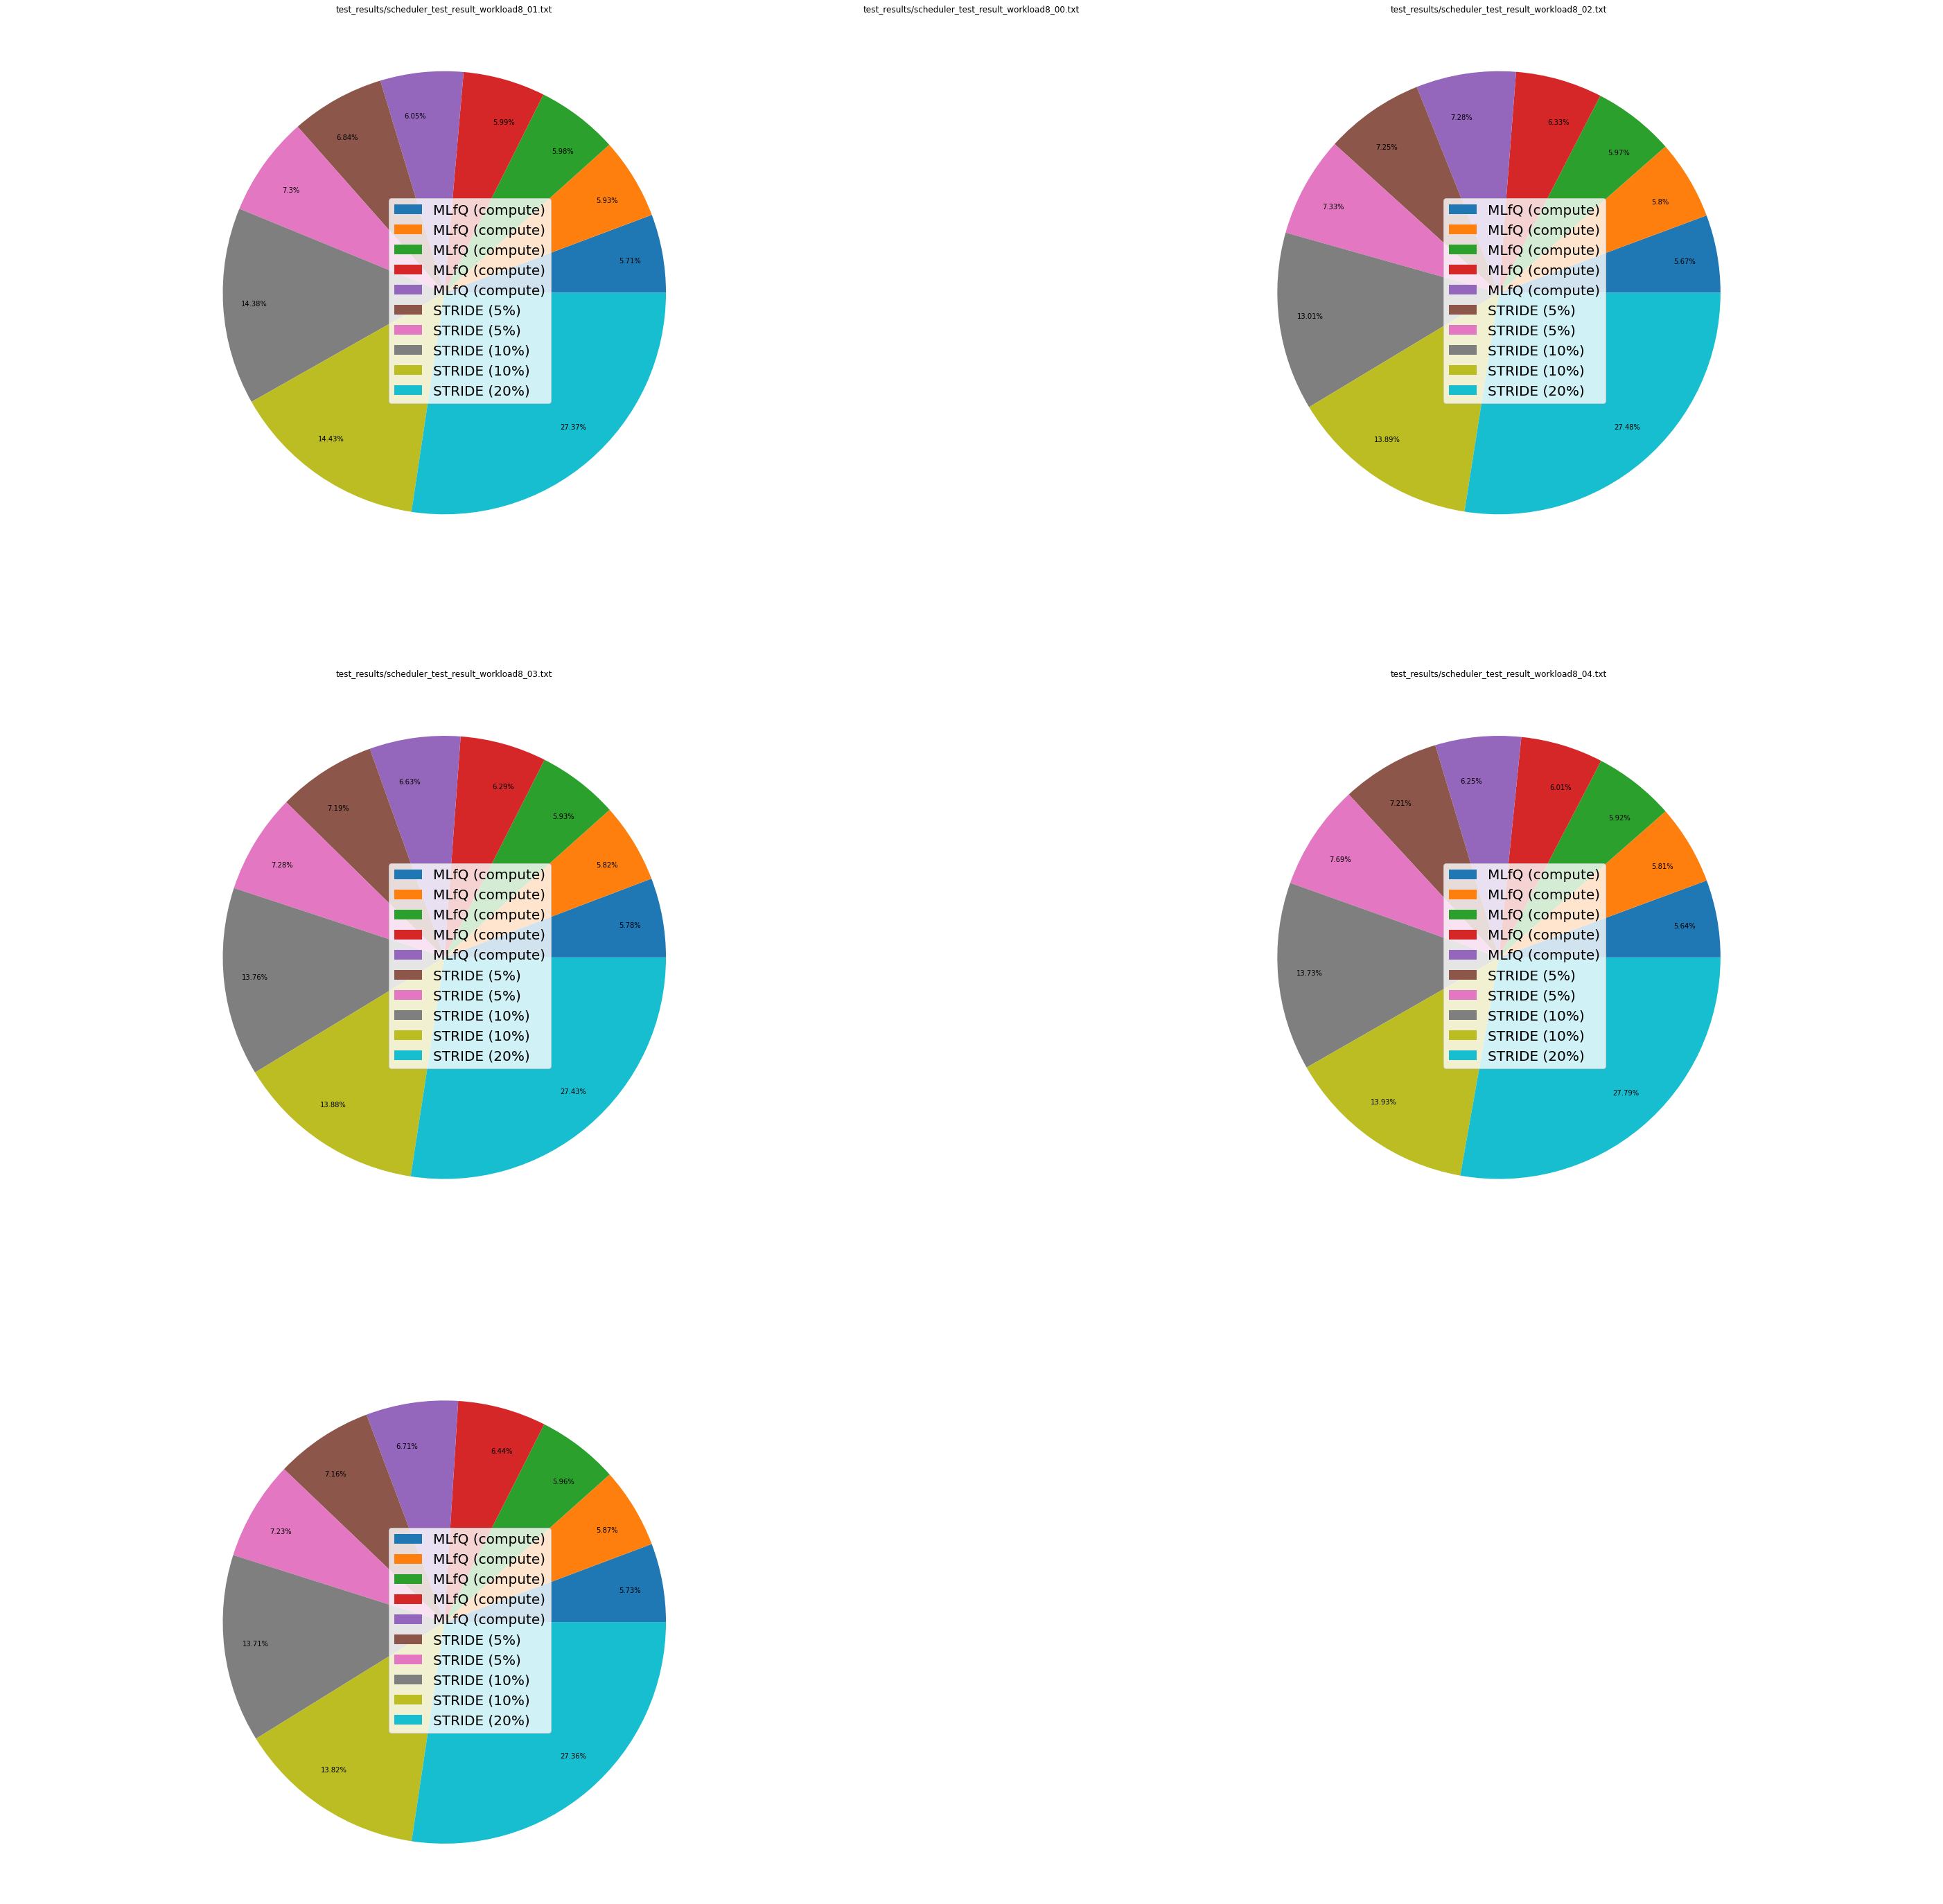

In [15]:
plot_workload(8)

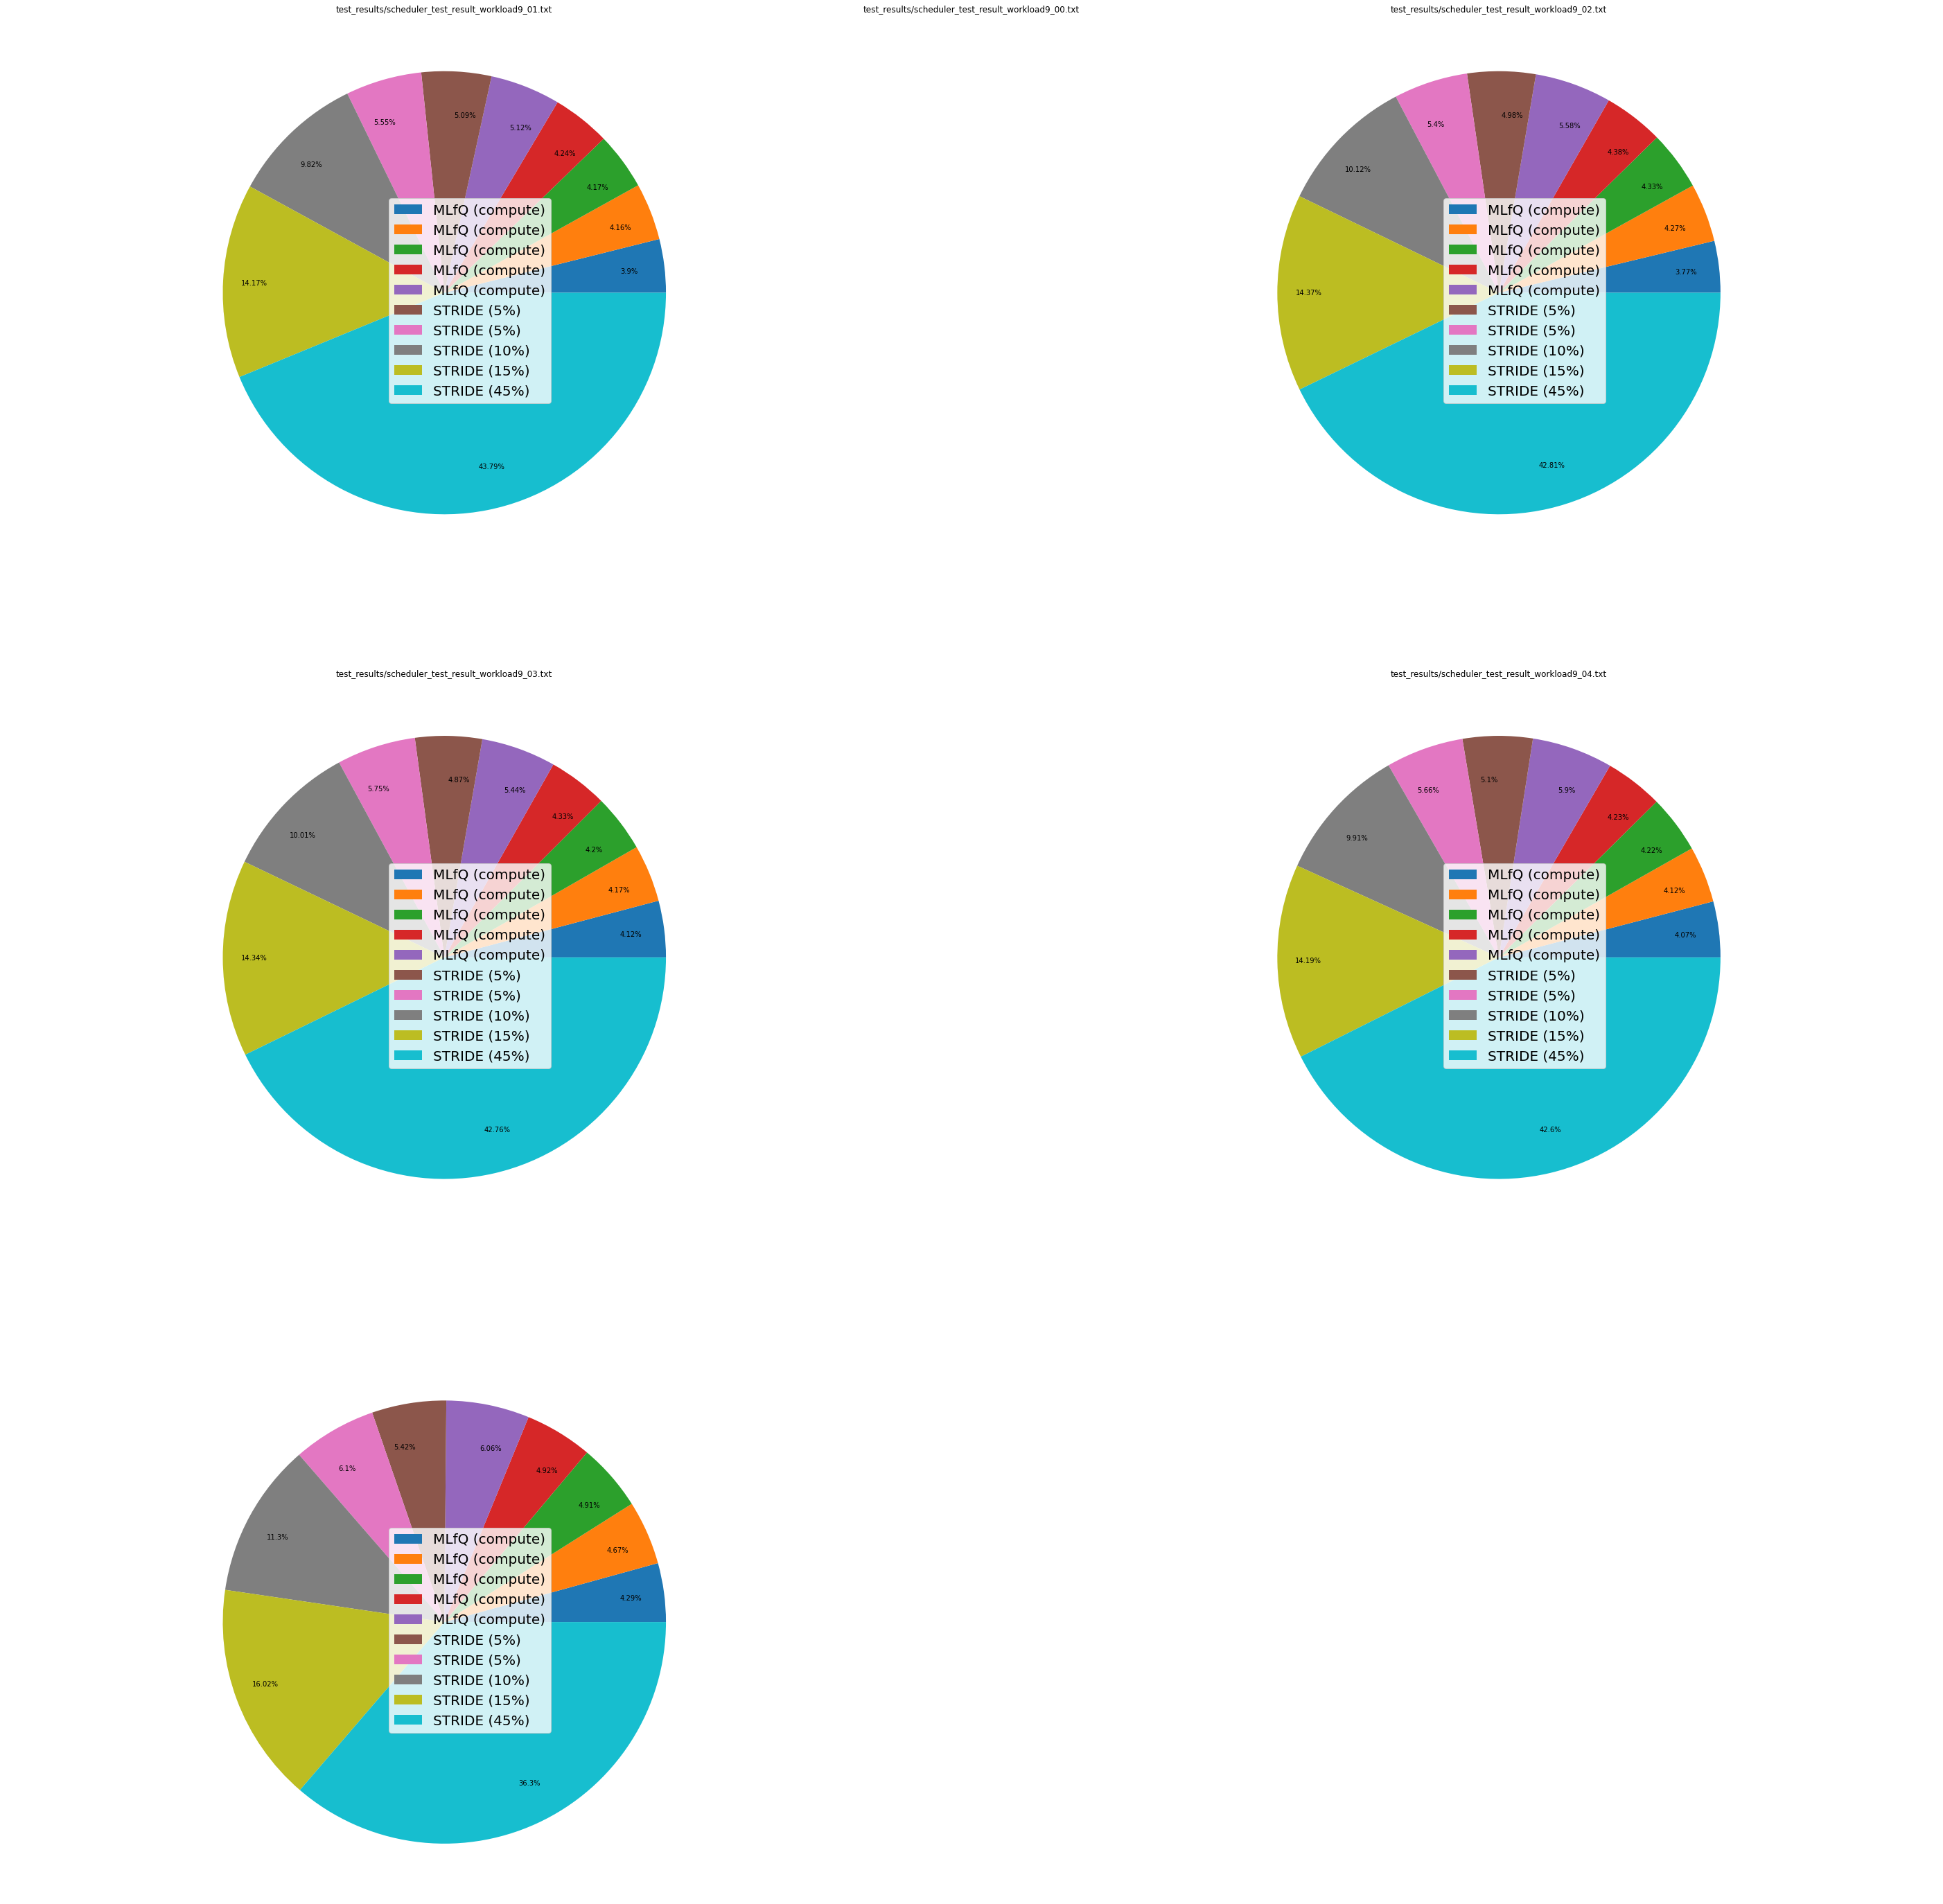

In [16]:
plot_workload(9)